# Credit Card Fault Detection

## About the Dataset:

<div style="background-color:#CDE8E5 ; padding: 10px 12px; border: 2px solid #7AB2B2; border-radius: 02px;">
    <p><strong></strong></p>
    <ul style="list-style-type: square; color: #A91D3A;font-size: 15px",box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);>
    <p>A credit card 💳 is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. </p>
    <p>The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
       This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.</p>
     <p>We have to build a classification model to predict whether a transaction is fraudulent or not. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.</p>
    </ul>
</div>

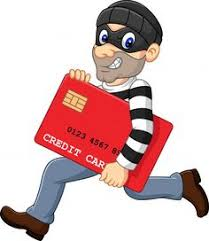



The link for the dataset is [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

<a id="table_content"></a>

## Table of Content
- **[1: Import Libraries](#l)**
- **[2: Read Dataset](#2)**
- **[3: Dataset Overview](#3)**
   - **[3.1: Descriptive Statistics](#3.1)**
- **[4: EDA](#4)**           
- **[5: Data Preprocessing](#5)**
    - **[5.1: Checking for outliers](#5.1)**
     - **[5.2: Missing value Treatment](#5.2)**
     - **[5.3: Checking for imbalanced data](#5.3)**
       - **[5.3.1: Handle Imbalance data](#5.3.1)**
- **[6: Splitting the Dataset](#6)**
   - **[6.1:Power Transformation](#6.1)**
 - **[7: Model Building](#7)**
   - **[7.1:Logistic Regression](#7.1)**
     - **[7.1.2: Logistic Regression Model Evaluation](#7.1.2)**
   - **[7.2: K Nearest Neighbour (KNN)](#7.2)**
     - **[7.2.1: KNN Model Evaluation](#7.2.1)**
   - **[7.3: XGBoost Model Building](#8)**
     - **[7.3.1: XGBoost Hyperparameter Tuning](#7.3.1)**
     - **[7.3.2: XGBoost Model Evaluation](#7.3.2)**
- **[8:Conclusion](#8)**  


# <p id="1" style="text-align: center; padding: 20px; background-color: #C4E4FF; border-radius: 3px; border: 2px solid #003C43; font-size: 24px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">1: Import Libraries</p>
⬆️[Table Contents](#table_content)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\HP'

In [3]:
os.chdir("C://Users//HP//OneDrive//Desktop//My Capstone")

# <p id="1" style="text-align: center; padding: 20px; background-color: #C4E4FF; border-radius: 3px; border: 2px solid #003C43; font-size: 24px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">2: Read Dataset</p>
⬆️[Table Contents](#table_content)

In [4]:
data=pd.read_csv("creditcard.csv")


In [5]:
df=data.copy()


In [6]:
pd.set_option("display.max_columns",29)

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,...,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,...,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,...,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,...,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,...,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape

(284807, 31)

In [9]:
#length of the dataframe
len(df)

284807

In [10]:
# columns in dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
# Count of total no. of columns in dataset
len(df.columns)

31

In [12]:
# No. of duplicate values in dataset
df.duplicated().sum()

1081

<div style="background-color: #C3FF93; padding: 10px 12px; border: 2px solid #7ABA78; color: #004085 ;border-radius: 8px">
    <h3>Inference:</h3>
     There are 1081 duplicate values in the dataset. We need to remove all the duplicated values.
</div>

# <p id="1" style="text-align: center; padding: 20px; background-color: #C4E4FF; border-radius: 3px; border: 2px solid #003C43; font-size: 24px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3: Dataset Overview</p>
⬆️[Table Contents](#table_content)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<div style="background-color: #C3FF93; padding: 10px 12px; border: 2px solid #7ABA78;color: #004085; border-radius: 8px;">
    
<b>Inference</b>:<br>
<ul style="list-style-type: square; color: #004085;">
    <li>The dataset contains <b>284807</b> entries.</li>
    <li>Each entry represents a Credit card Transaction.</li>
    <li>There are <b>31</b> columns in the dataset.</li>
    </ul>
<ul style="list-style-type: disc; color: #004085;">
        <li>There are no missing values in any column. </li>
    <li>The target variable is '<b>class</b>', which represents the status transaction is fraud or not.</li>
    <li>The features include only numerical (float64,int64) data types.</li>
    <li>Further analysis could involve exploring relationships between different features and the class, as well as building predictive models to classify the fraud detection.</li>
   </ul>

</div>

## 3.1: Descriptive Statistics

 ⬆️[Table Contents](#table_content)

In [14]:
# summary statistics for Numerical Features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# <p id="1" style="text-align: center; padding: 20px; background-color: #C4E4FF; border-radius: 3px; border: 2px solid #003C43; font-size: 24px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">4: Exploratory Data Analysis(EDA)</p>
⬆️[Table Contents](#table_content)

Text(0.5, 1.0, 'Distribution of Transaction Time')

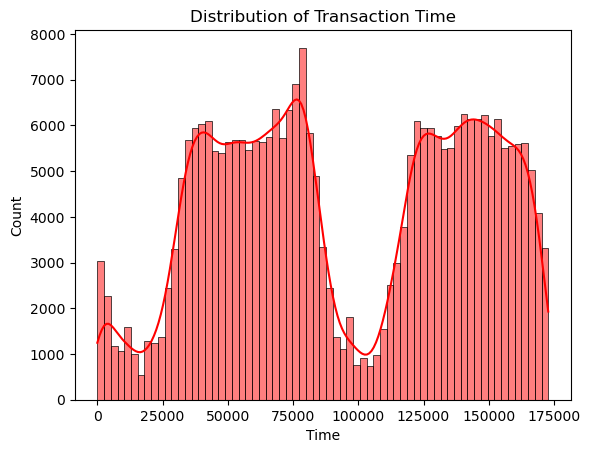

In [15]:
dt = sns.histplot(data=df, x=df["Time"], kde=True,color="red")
dt.set_title("Distribution of Transaction Time")


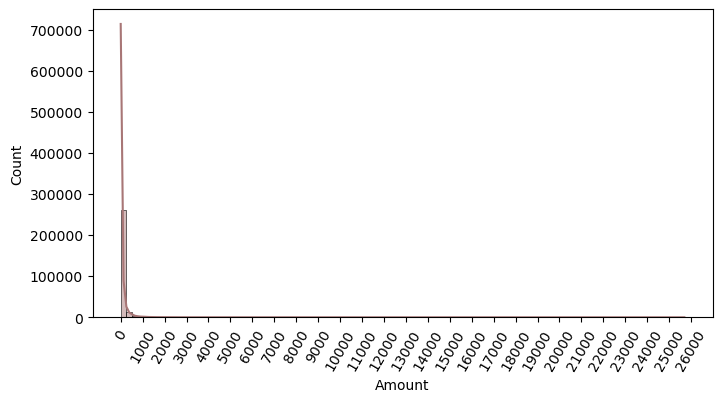

In [16]:
# Count and amount
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(df['Amount'], bins=100, kde=True, color="#A87676")
plt.show()

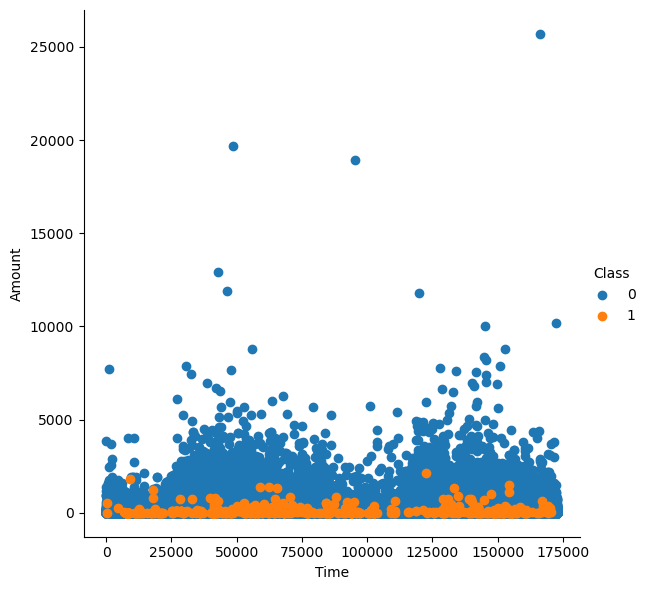

In [17]:
def pairplot_data(data, feature1, feature2, target):
    sns.FacetGrid(data, hue=target, height=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()


pairplot_data(df, "Time", "Amount", "Class")


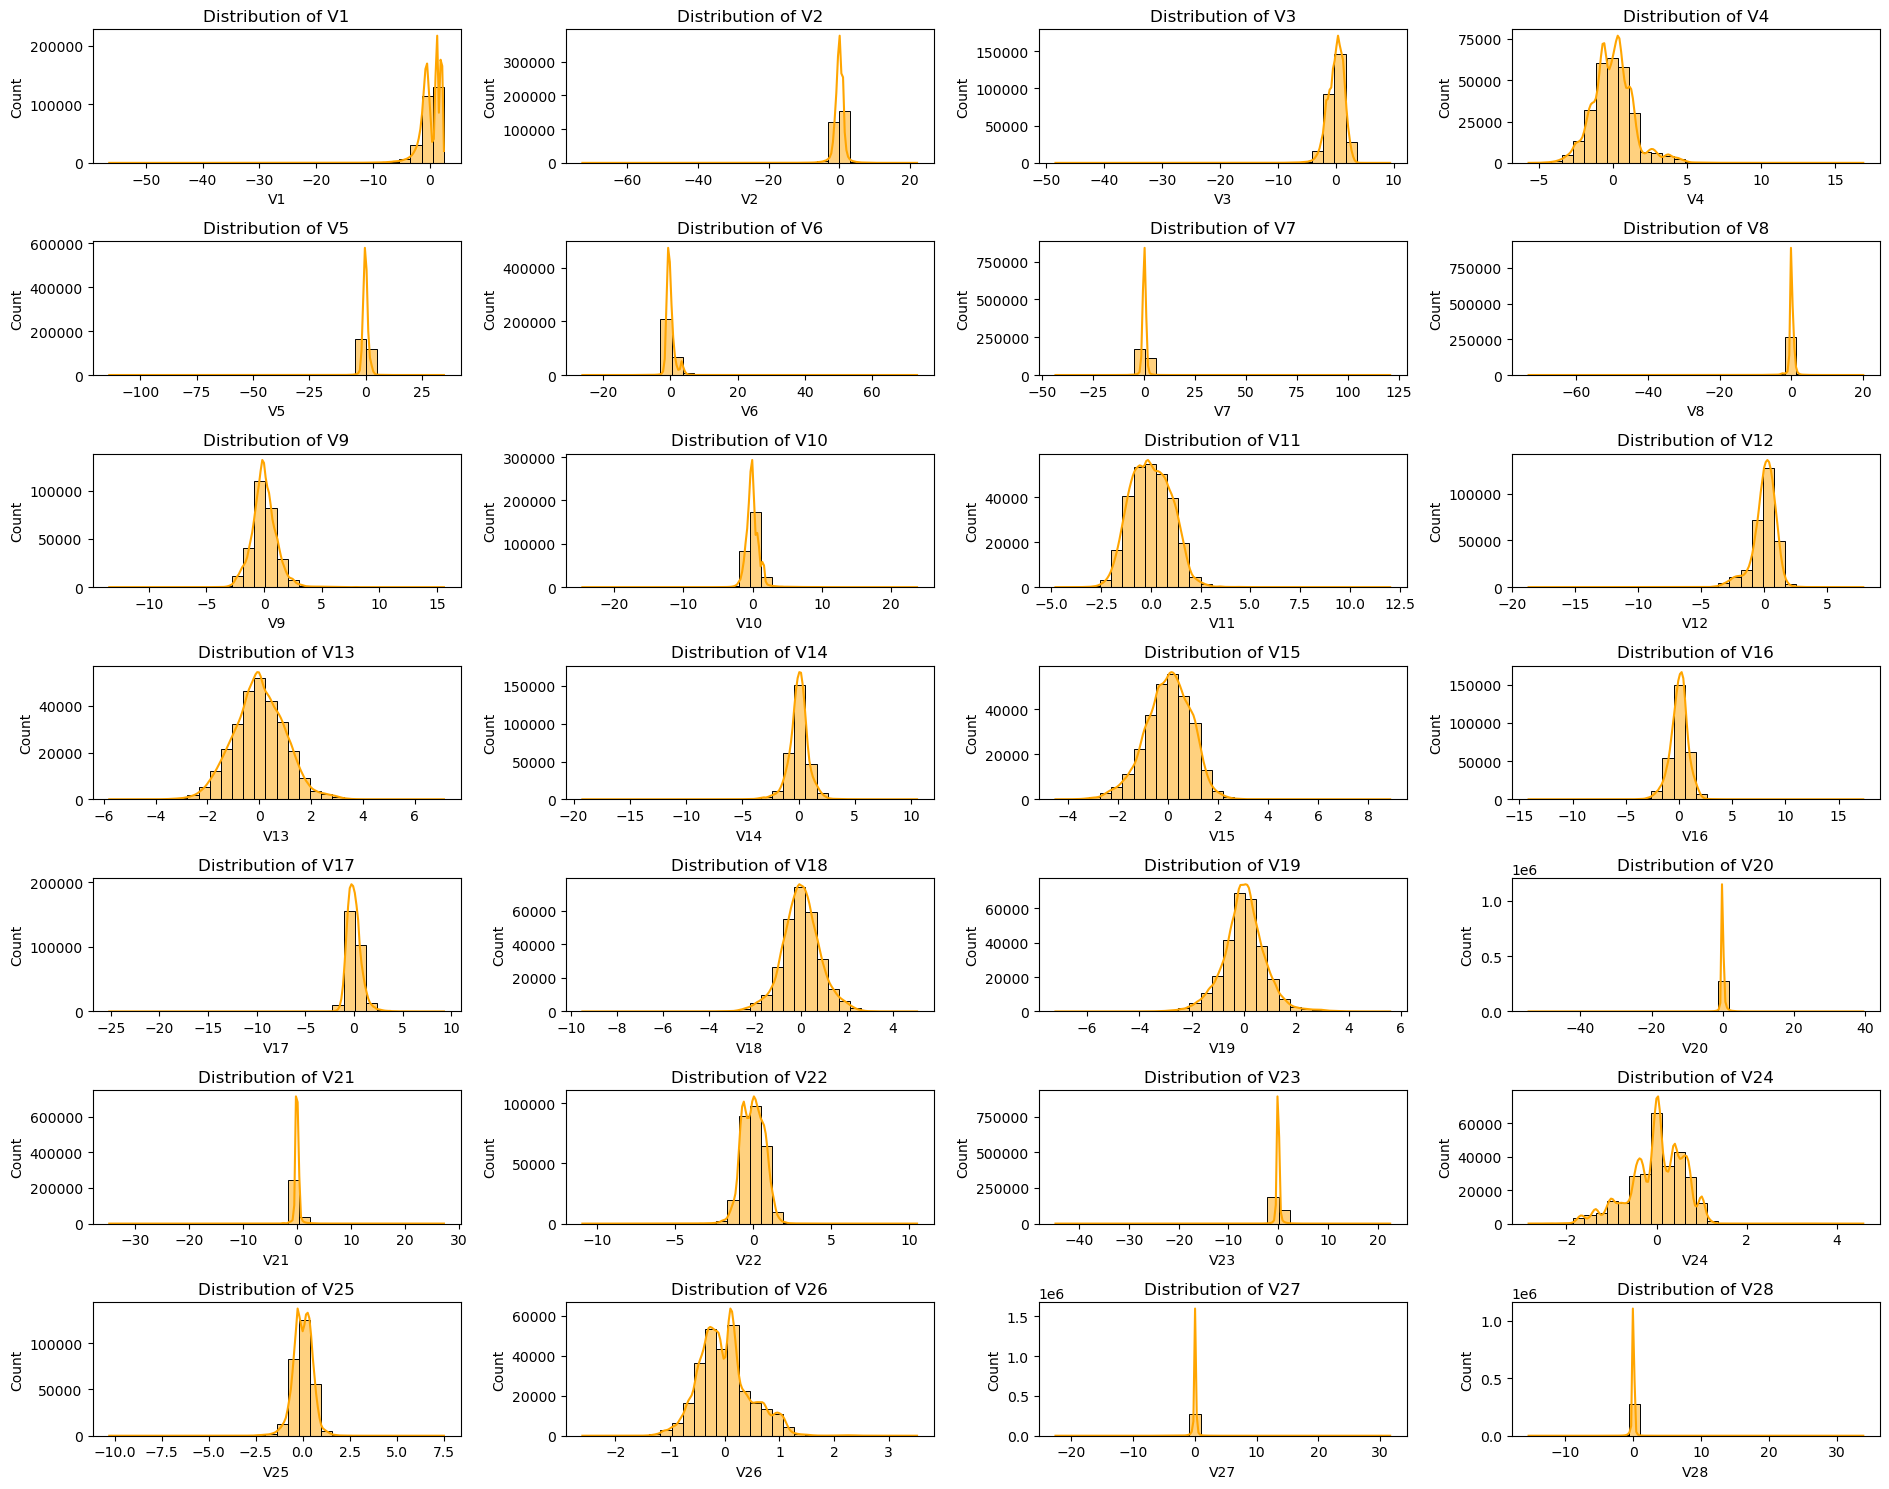

In [18]:
# Explore feature distributions
plt.figure(figsize=(19, 15))
for i in range(1, 29):  
    plt.subplot(7, 4, i)
    sns.histplot(df[f'V{i}'], bins=30, kde=True,color = 'orange')
    plt.title(f'Distribution of V{i}')
plt.tight_layout()
plt.show()

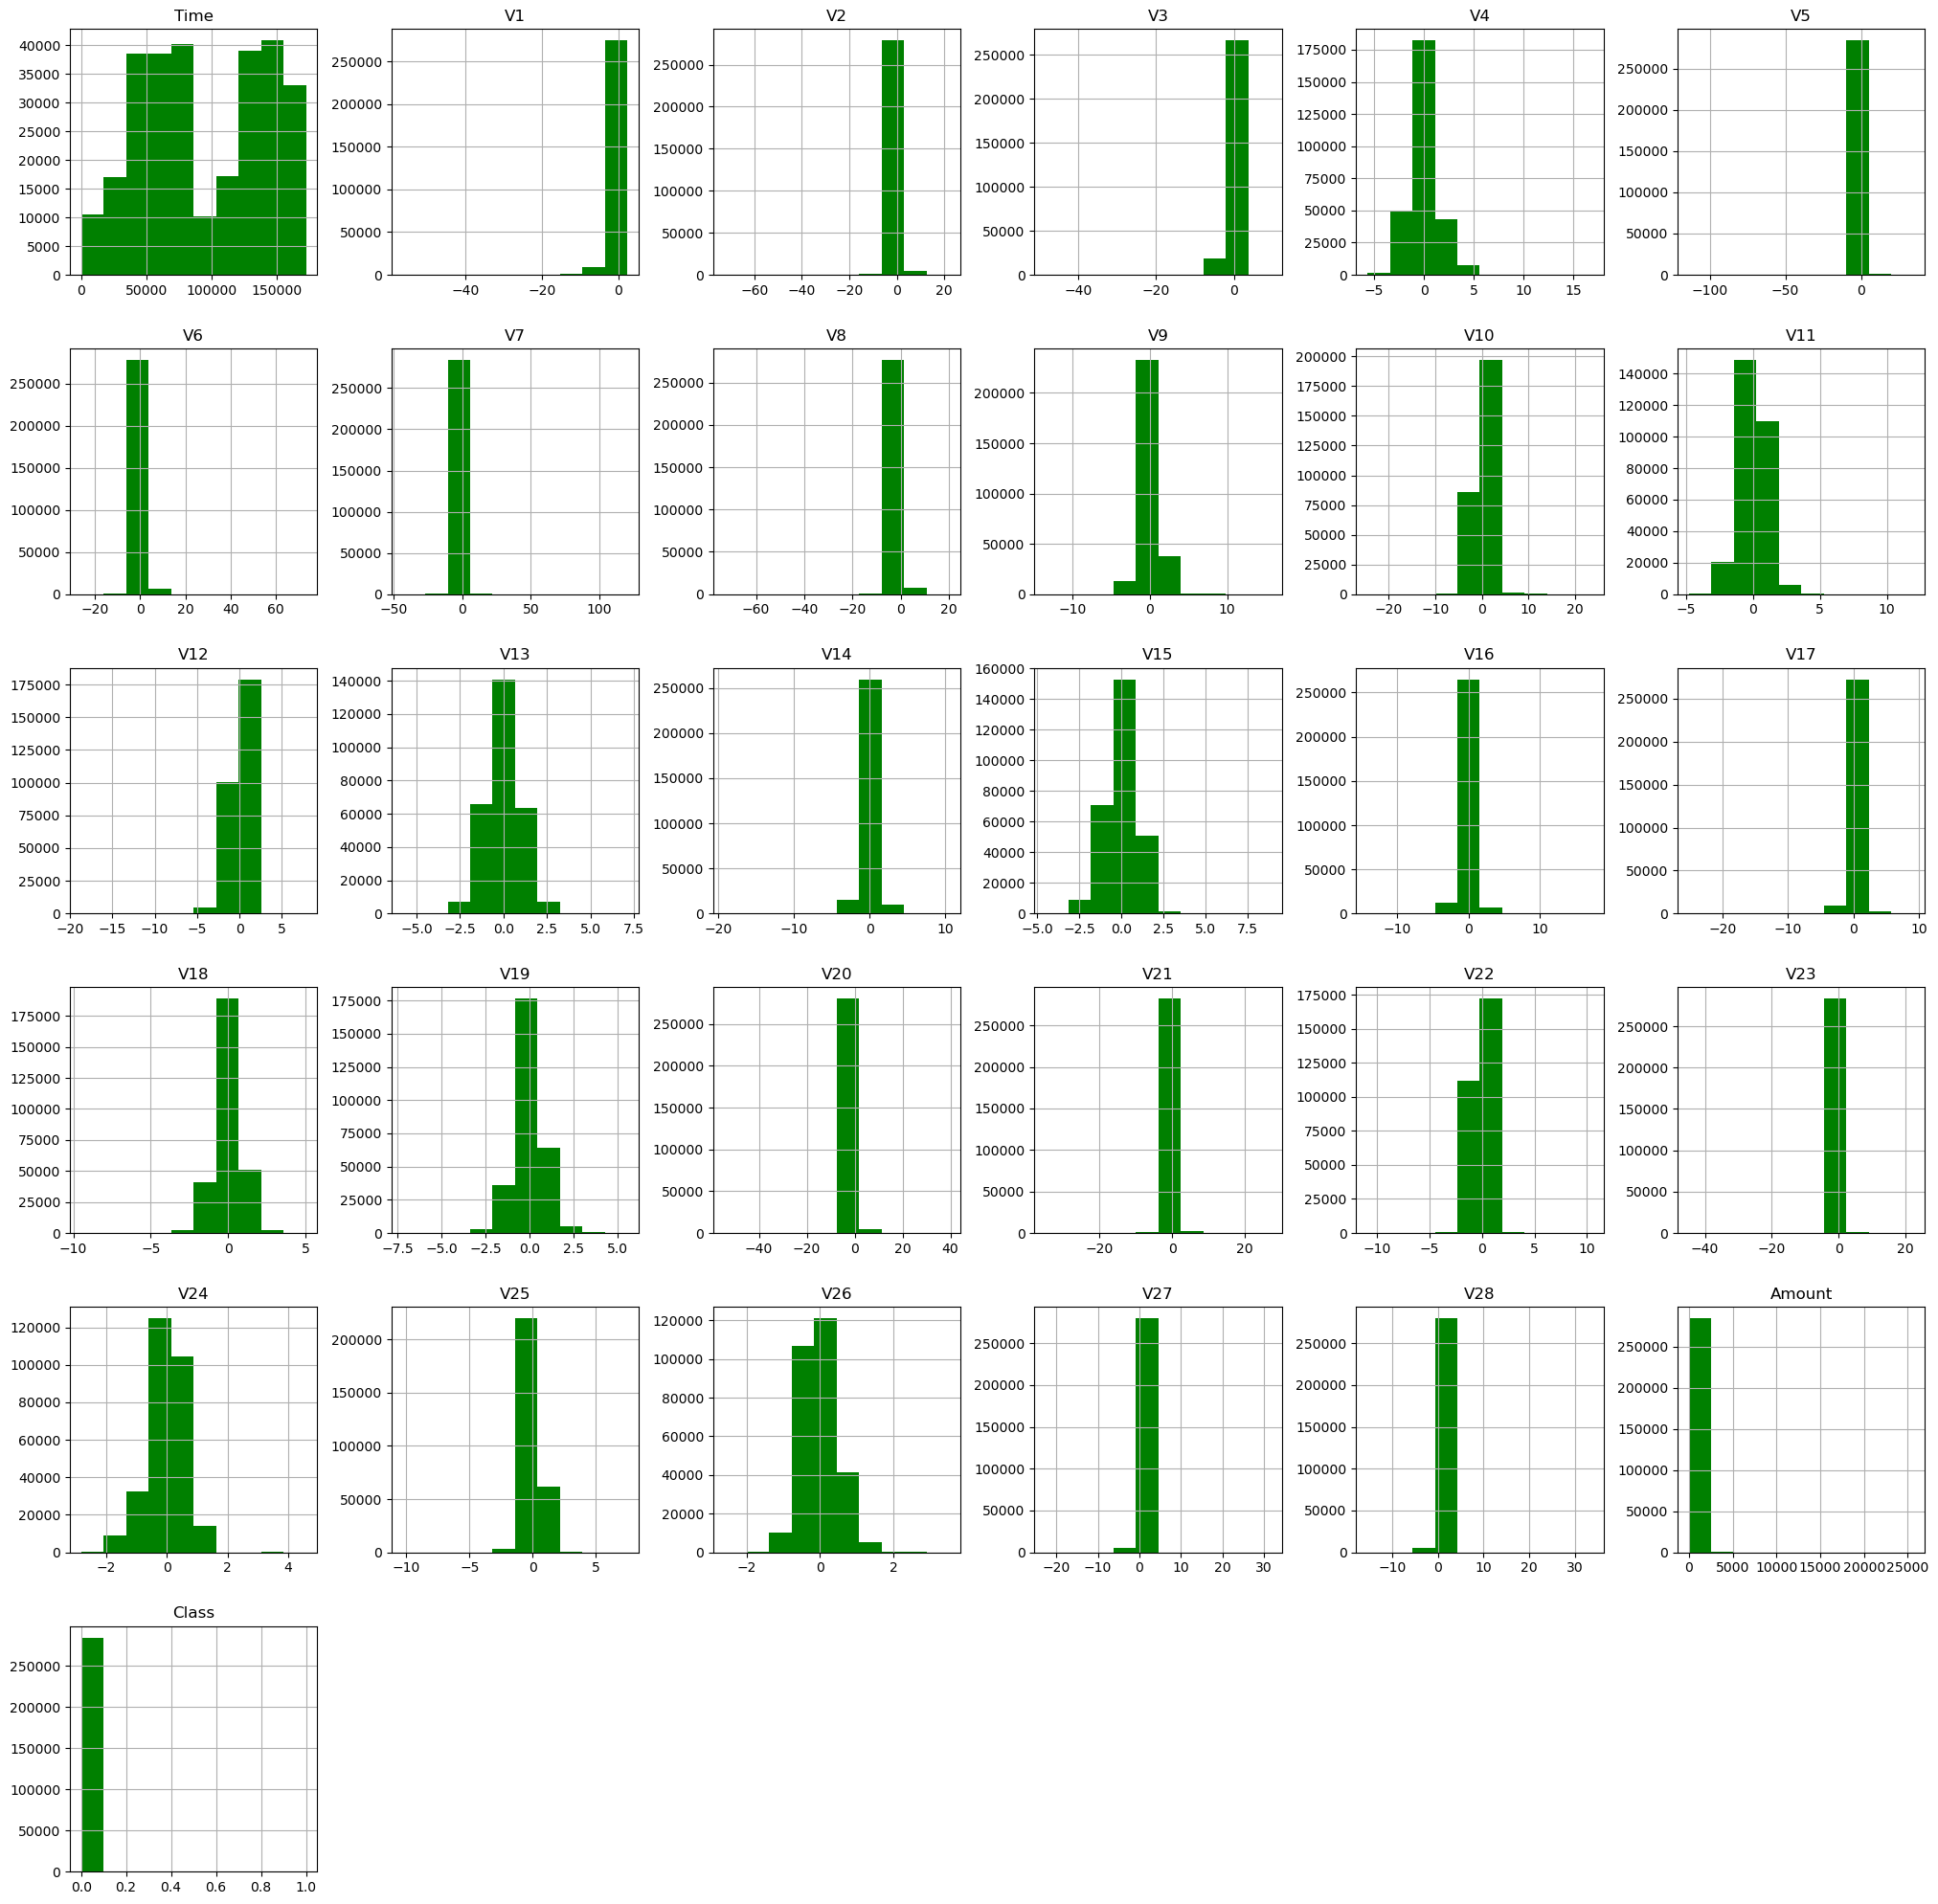

In [19]:
# For detection of any pattern using histogram
df.hist(figsize = (25,25), color="green")
plt.show()

<div style="background-color: #C3FF93; padding: 10px 12px; border: 2px solid #7ABA78; color: #004085 ;border-radius: 8px">
    <h3>Inference:</h3>
     This show that the data is highly skewed. Power Transformation is needed which is done ahead.
</div>

# <p id="1" style="text-align: center; padding: 20px; background-color: #C4E4FF; border-radius: 3px; border: 2px solid #003C43; font-size: 24px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">5: Data Preprocessing</p>
⬆️[Table Contents](#table_content)

- 1. Checking for Outliers in the data<br>
- 2. Missing Value Treatment<br>
- 3. Checking Imbalanced data<br>
- 4. Handling Imbalance data

# <p  style=" padding: 14px; font-size: 20px; background-color:#e2bfb3; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);"> 5.1: Checking for outliers in the data</p>
⬆️[Table Contents](#table_content)

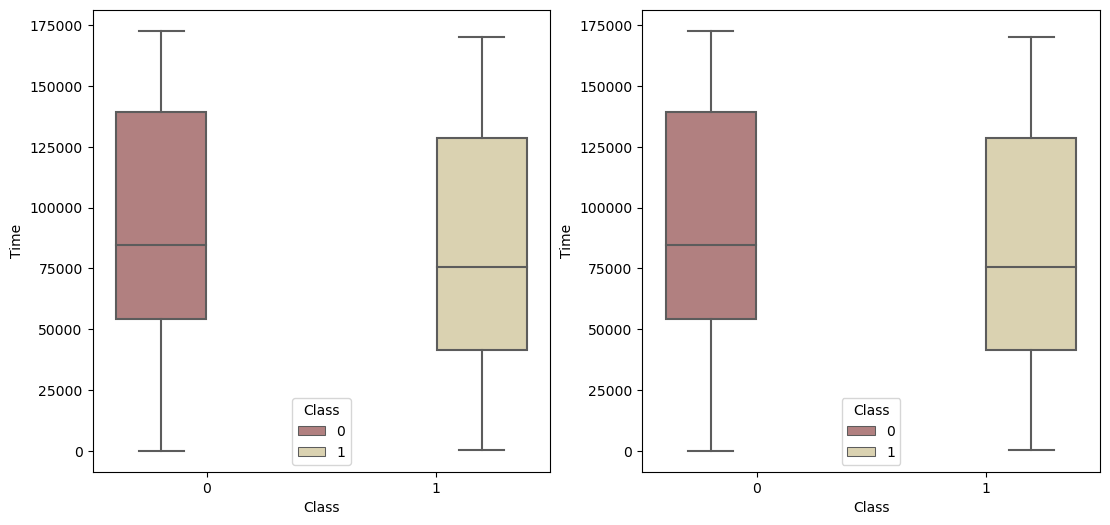

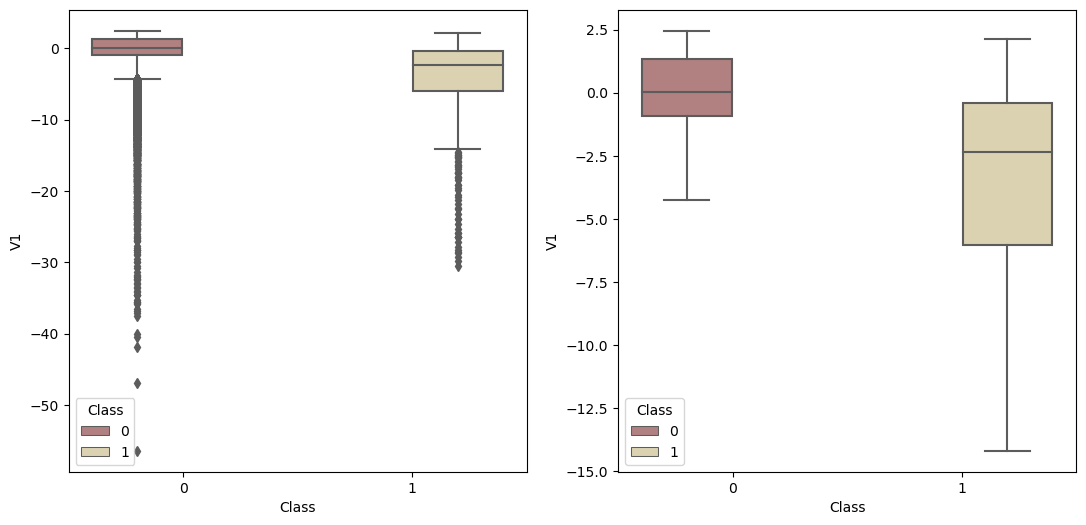

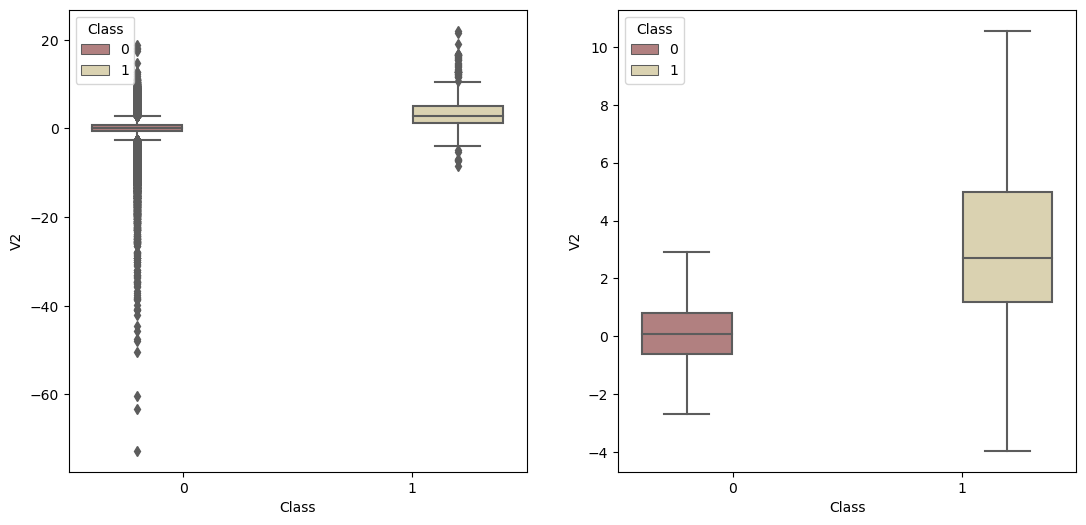

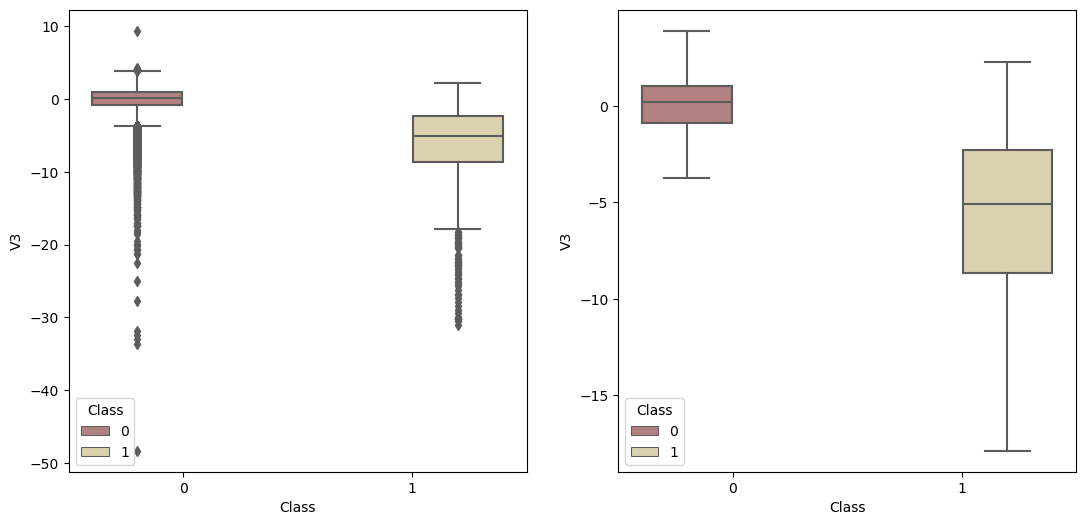

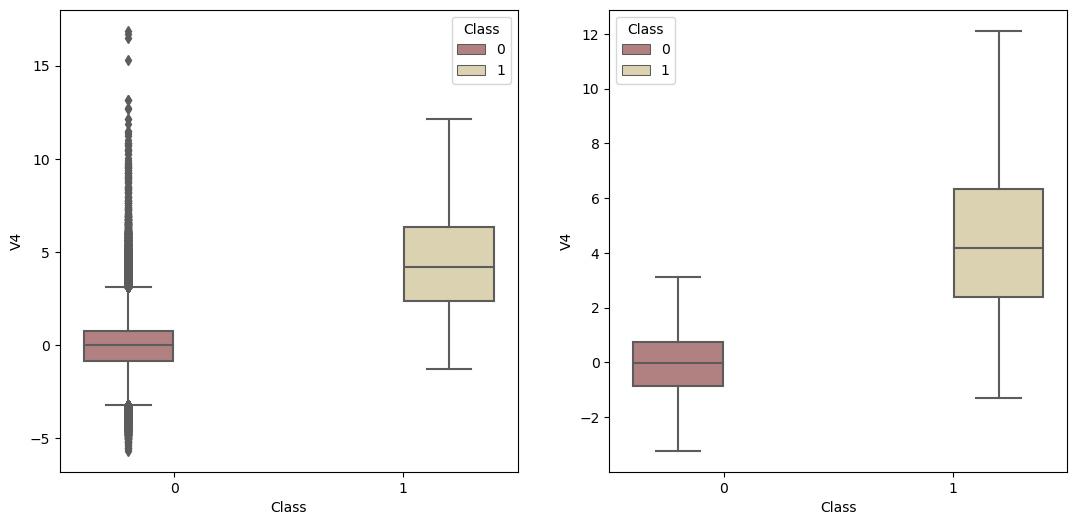

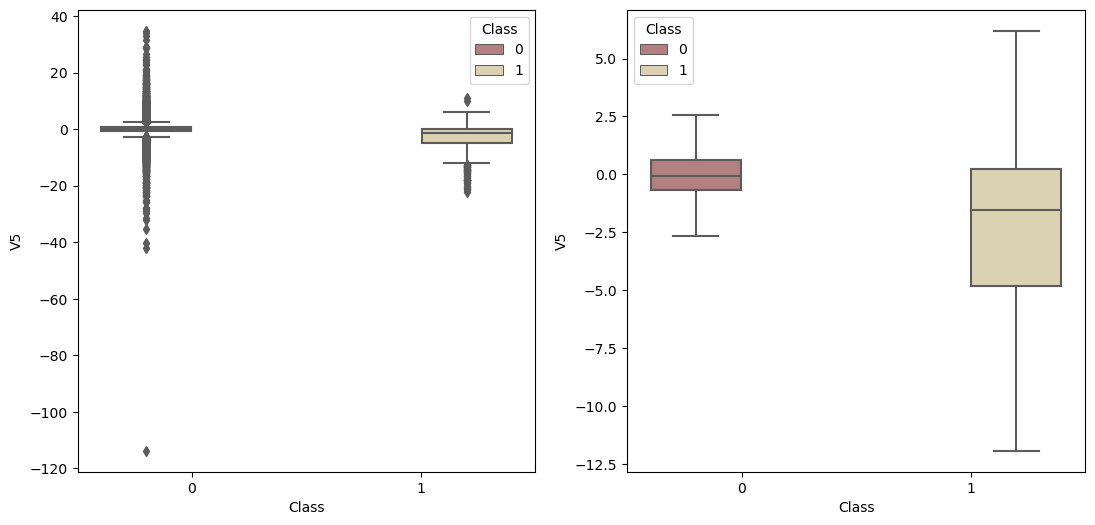

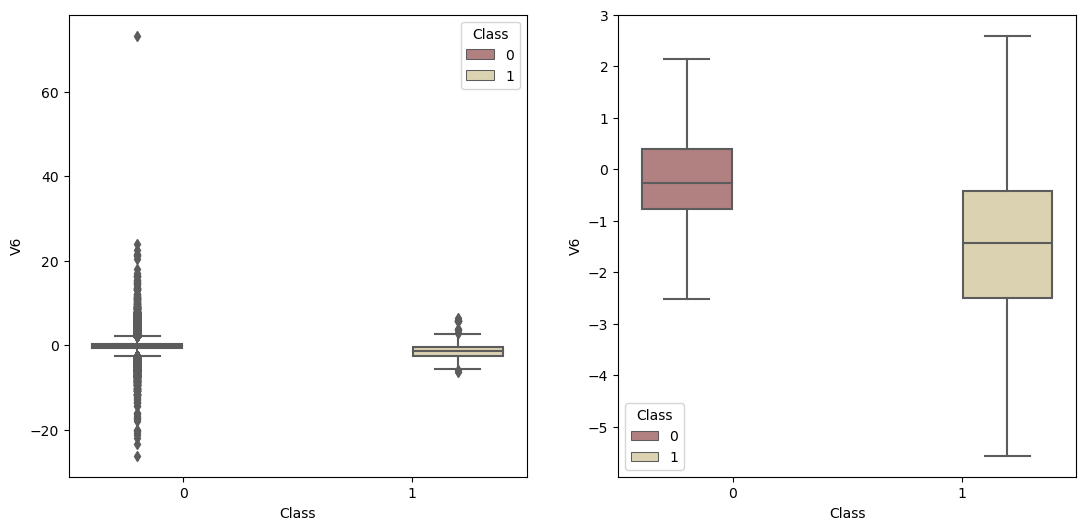

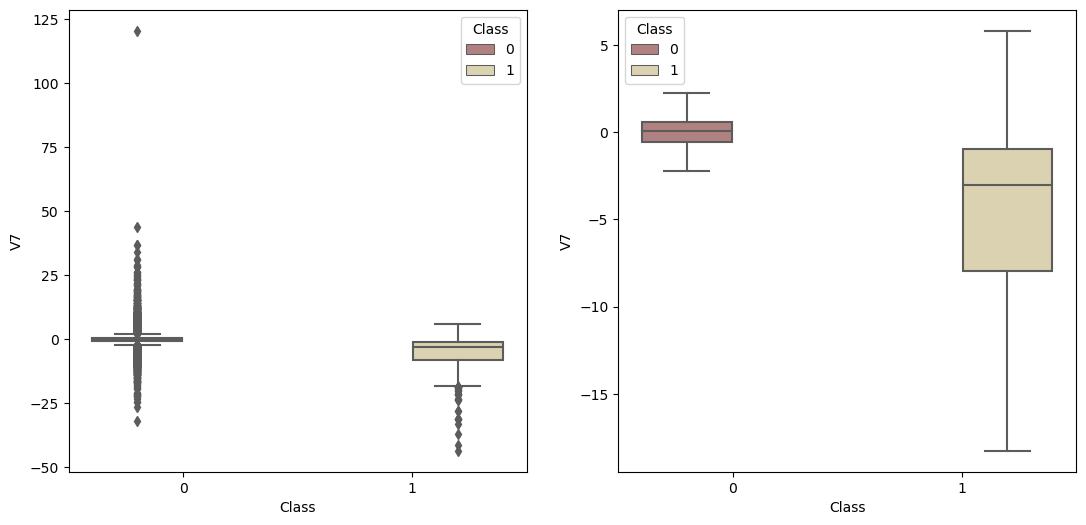

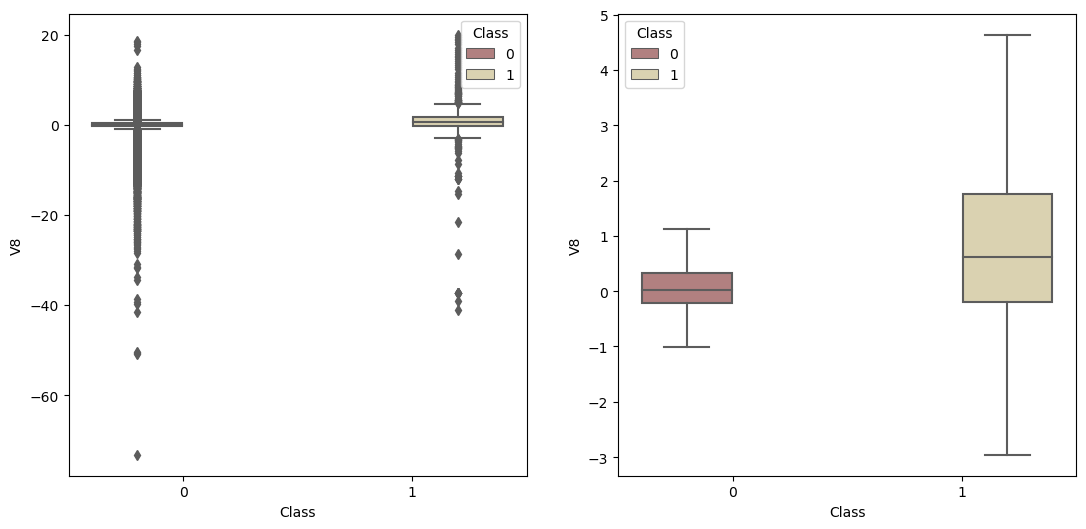

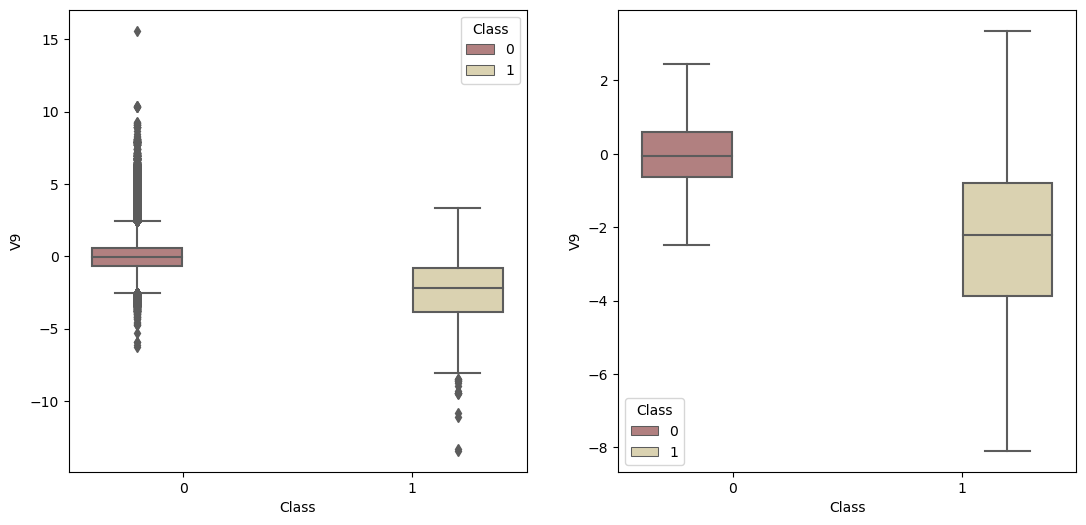

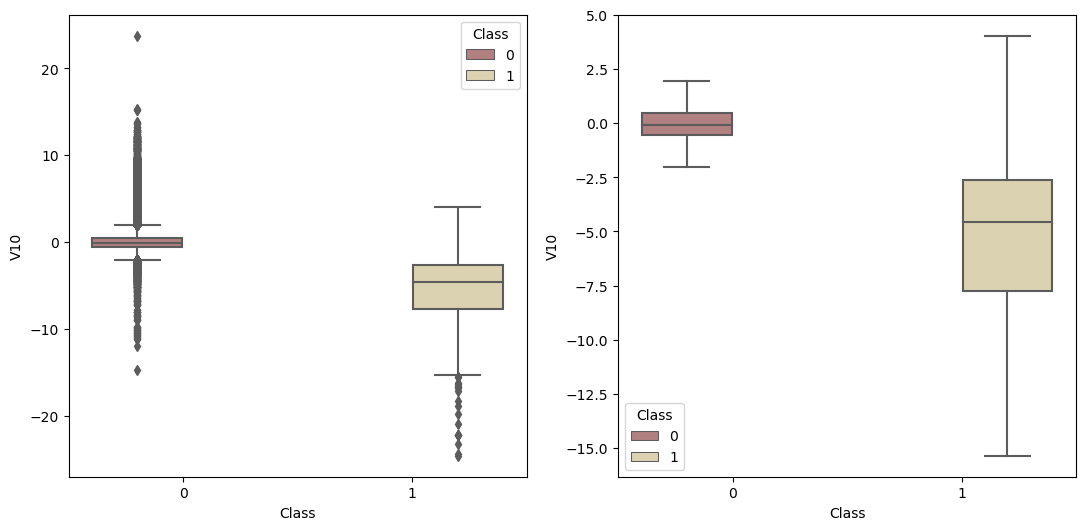

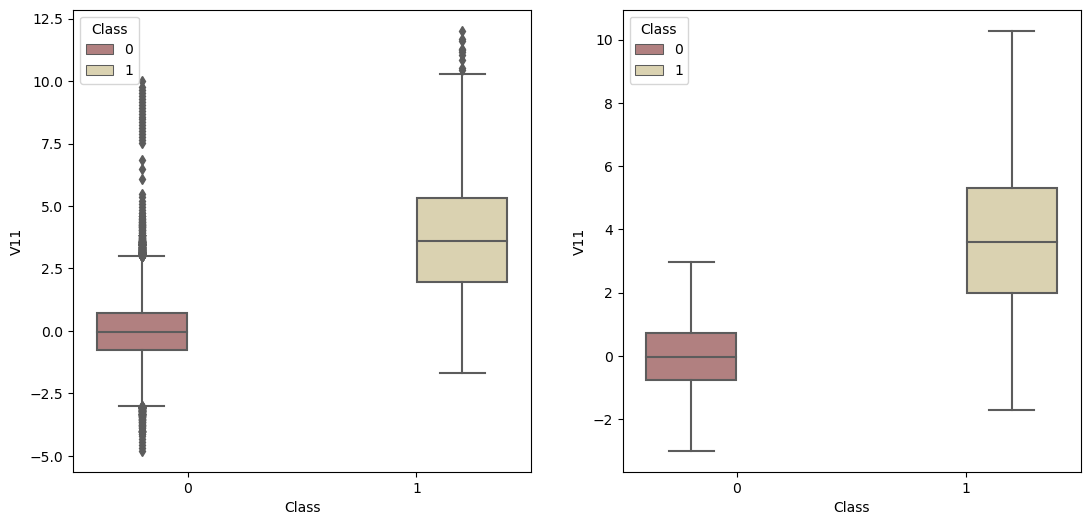

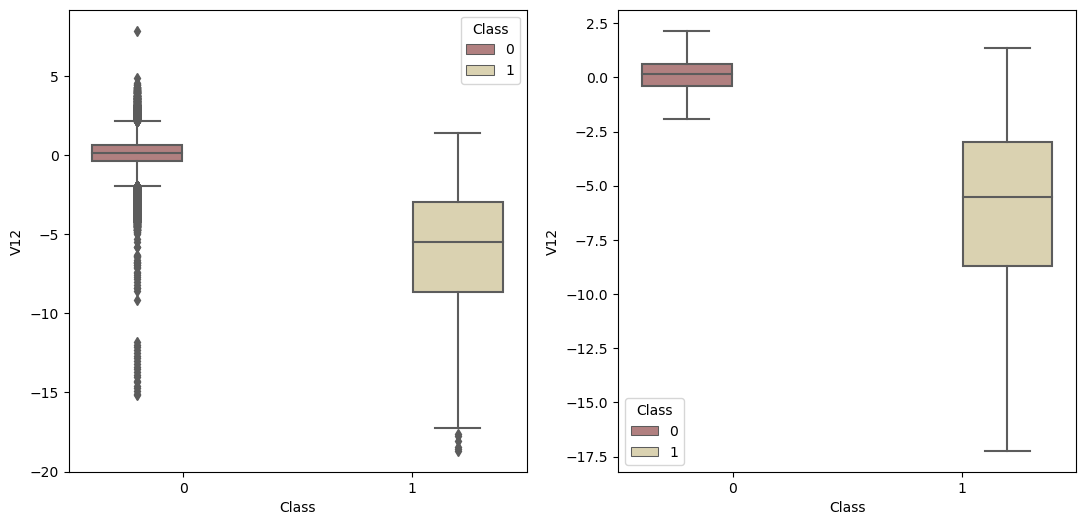

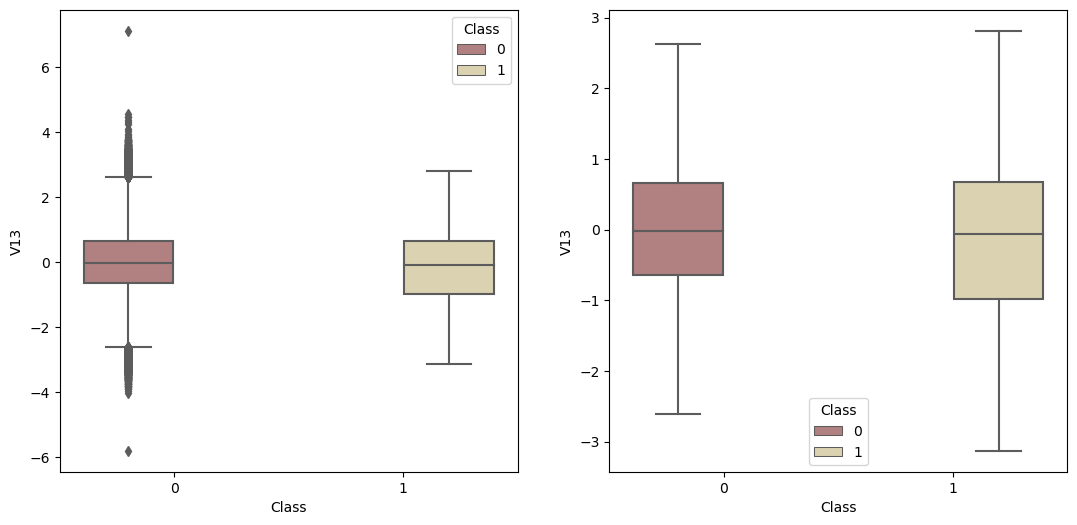

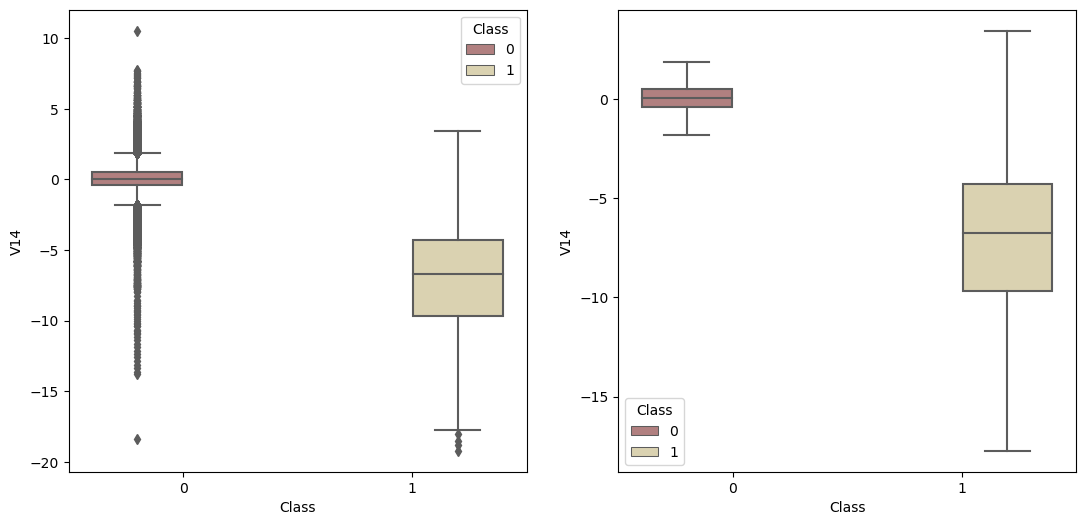

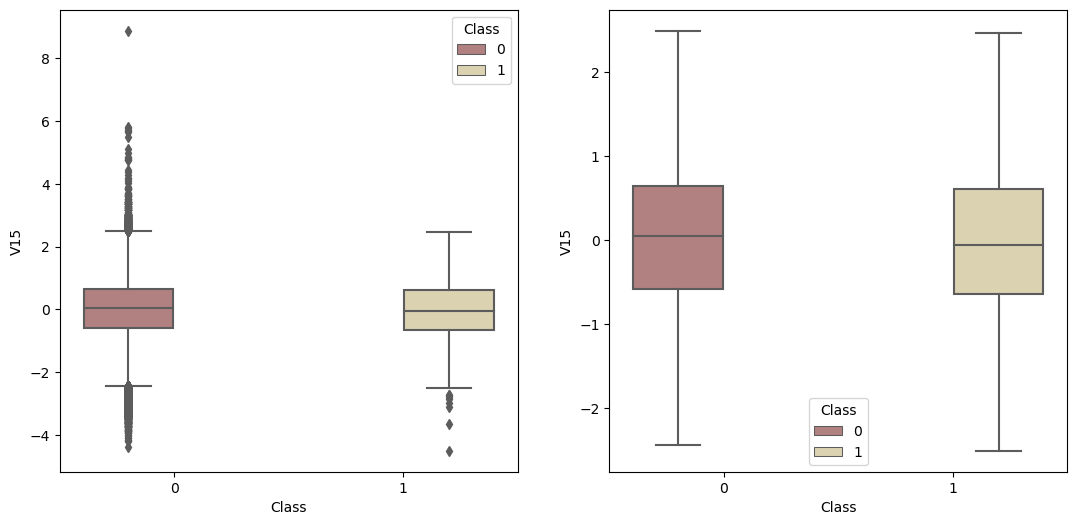

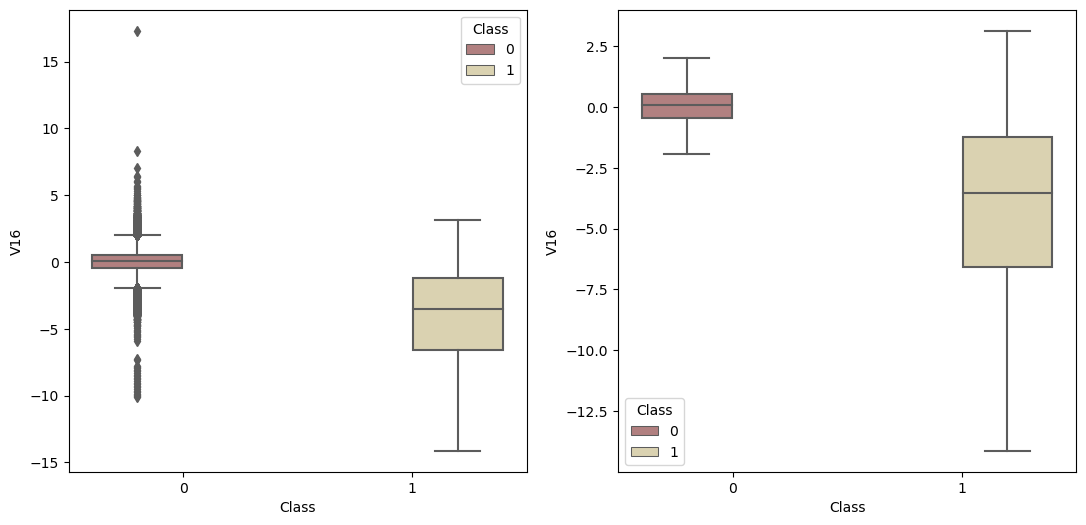

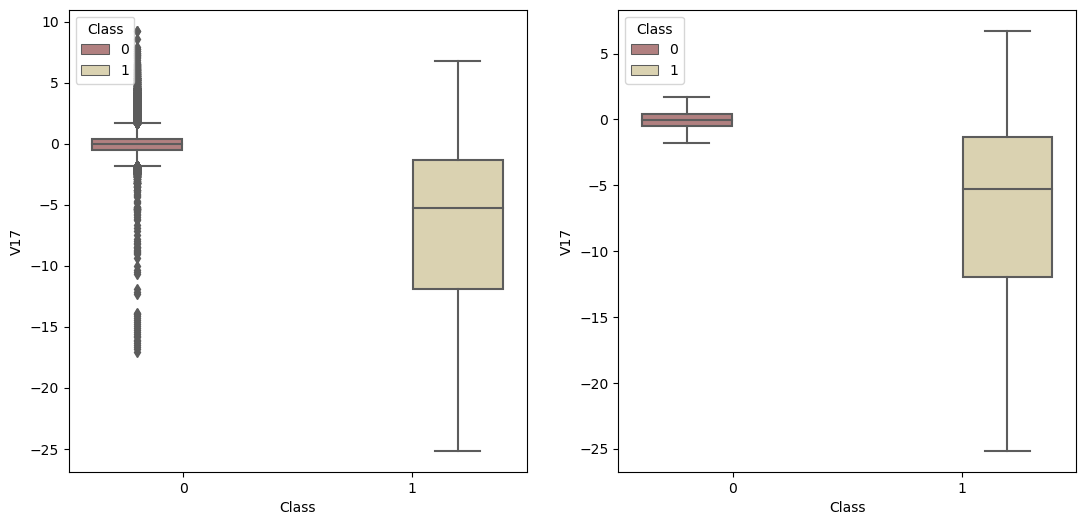

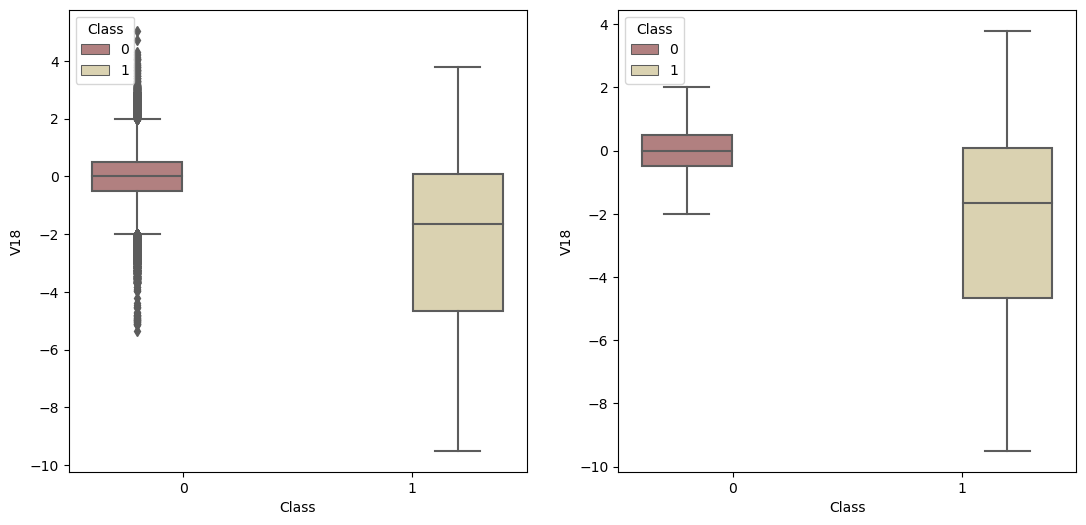

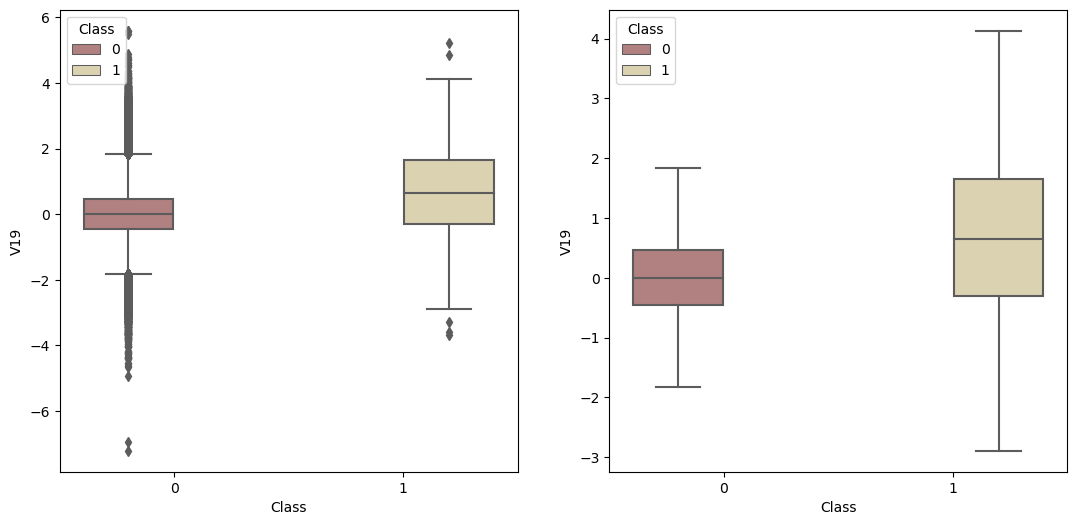

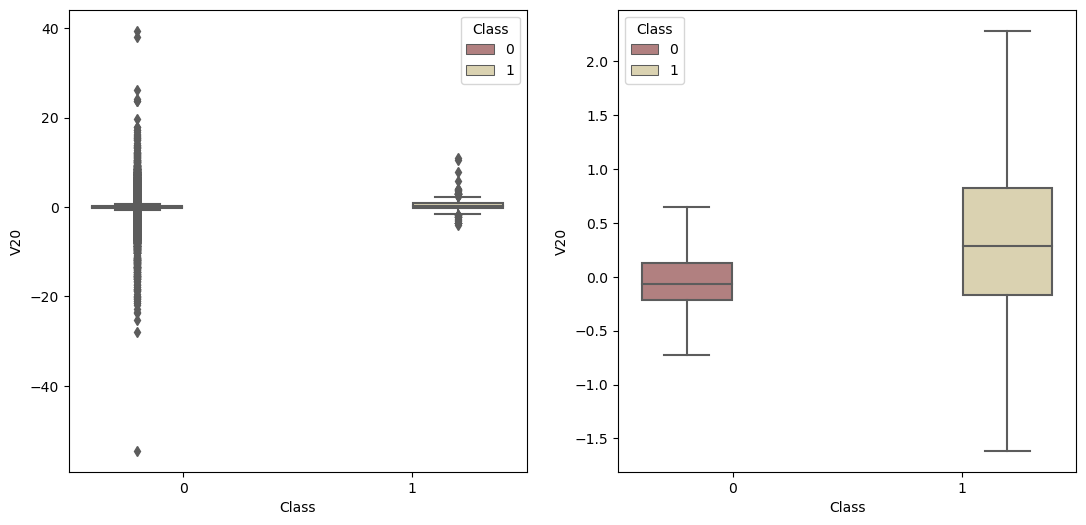

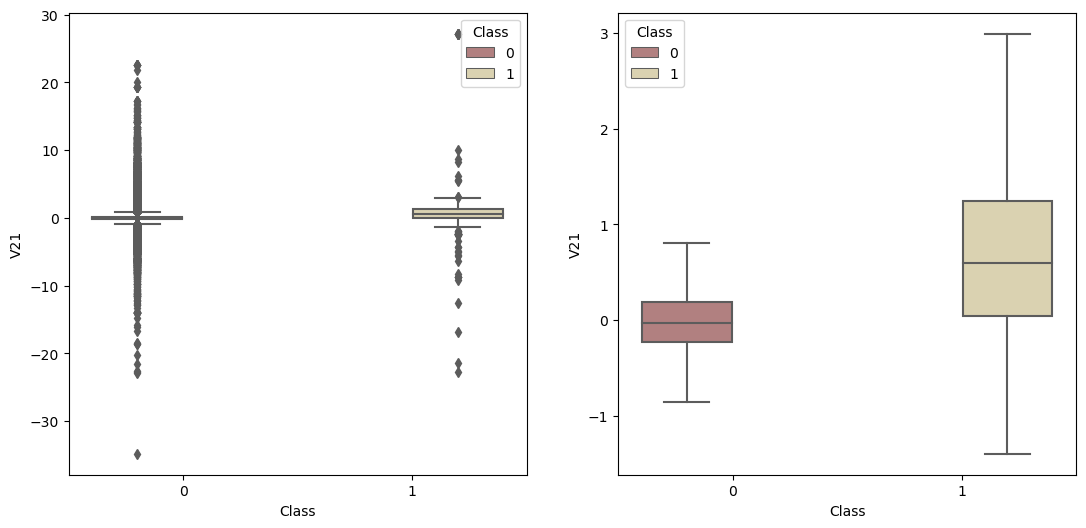

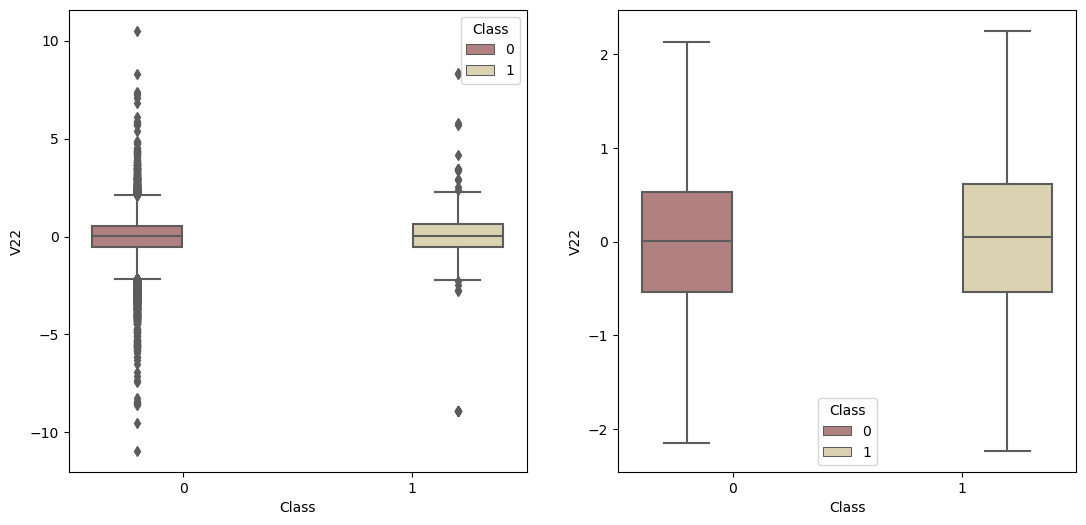

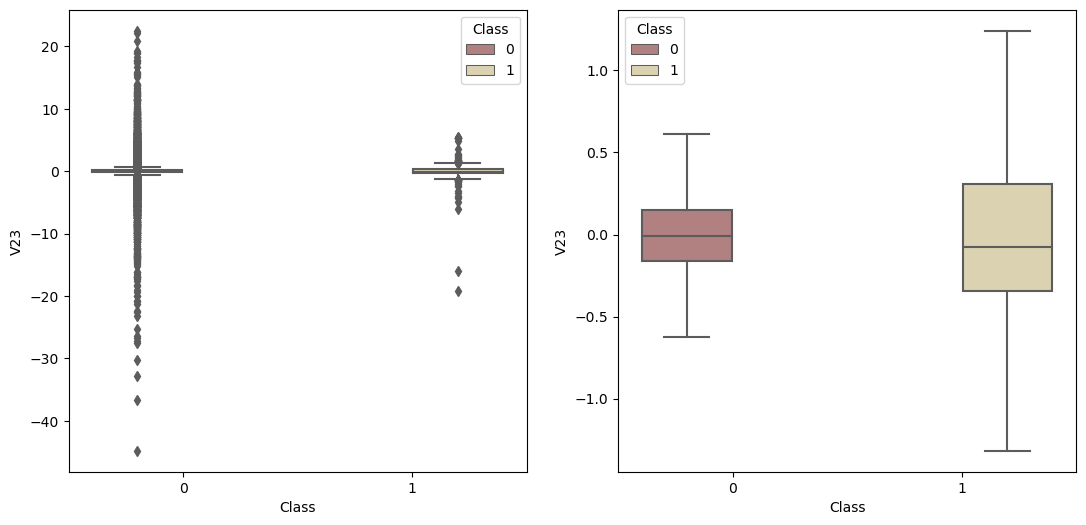

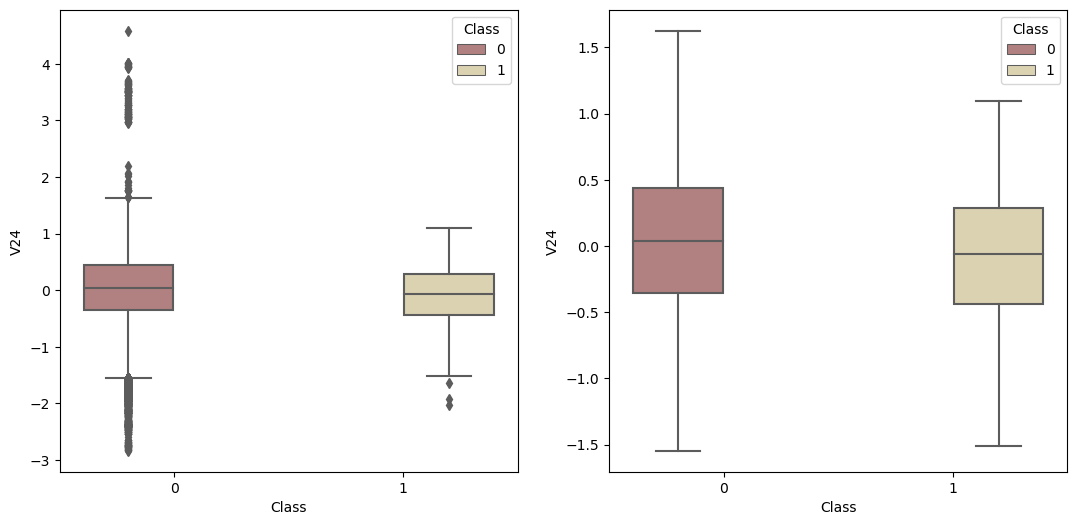

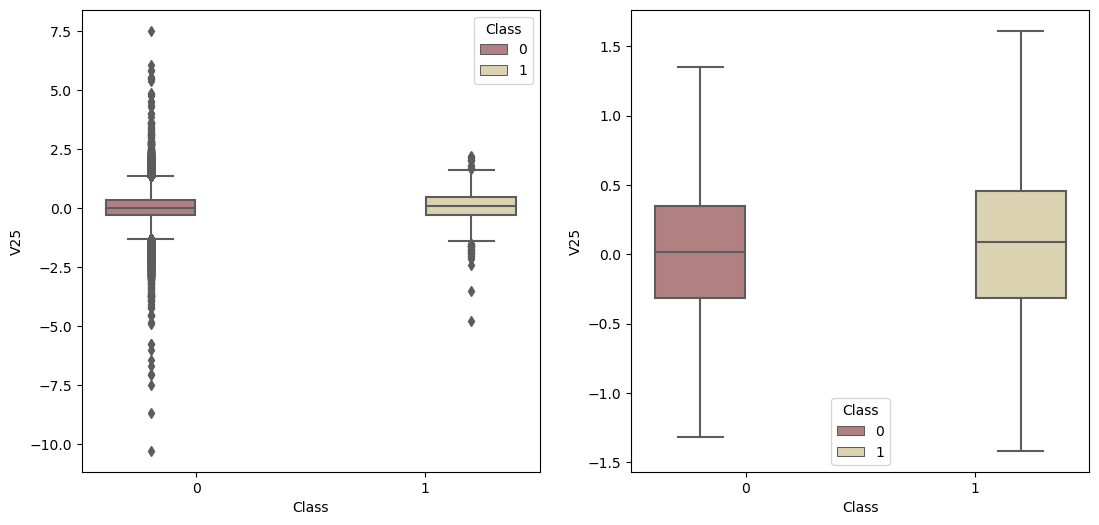

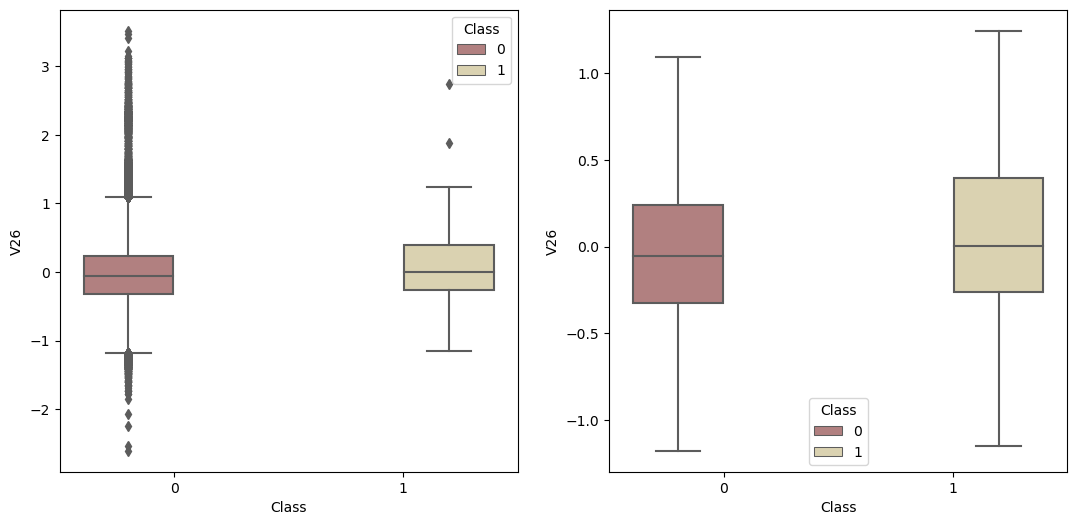

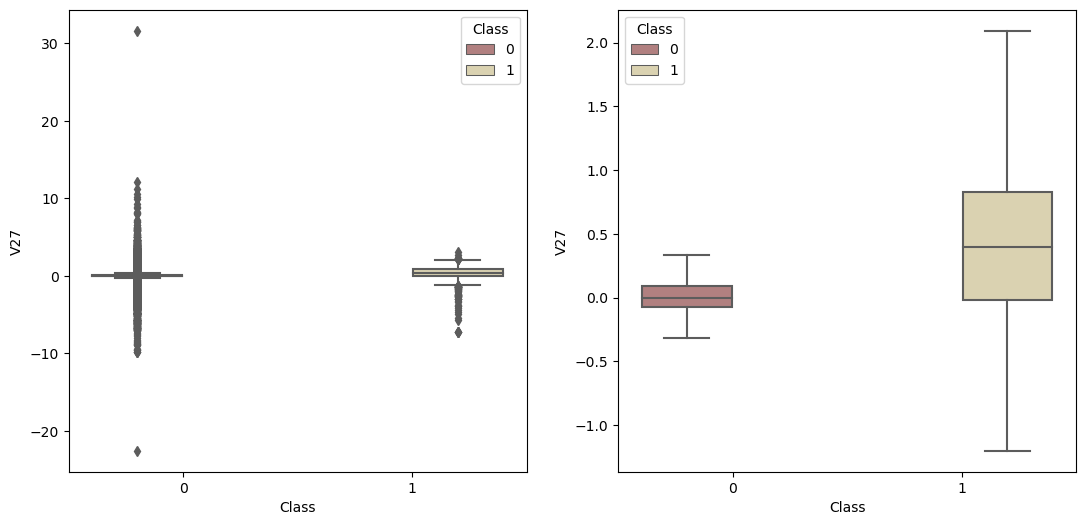

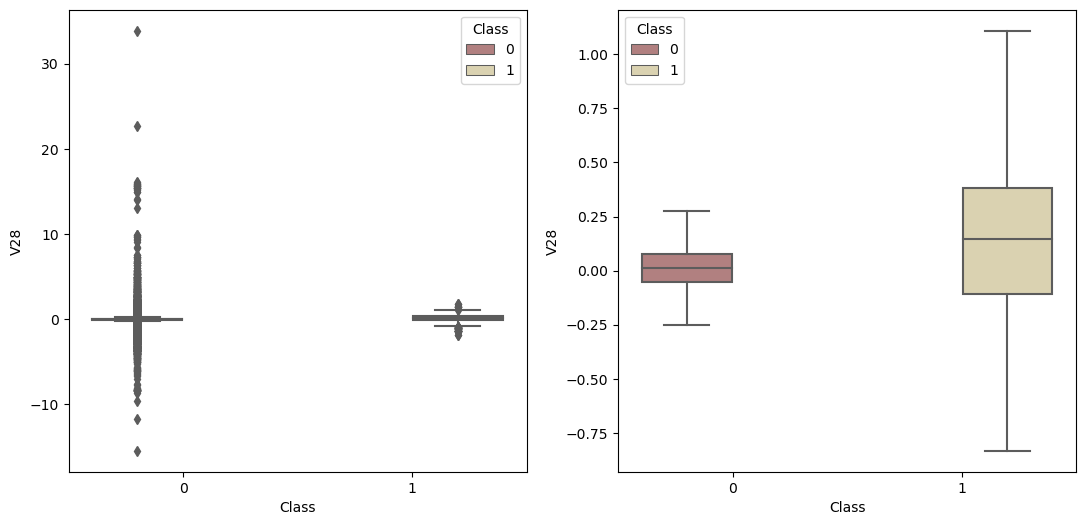

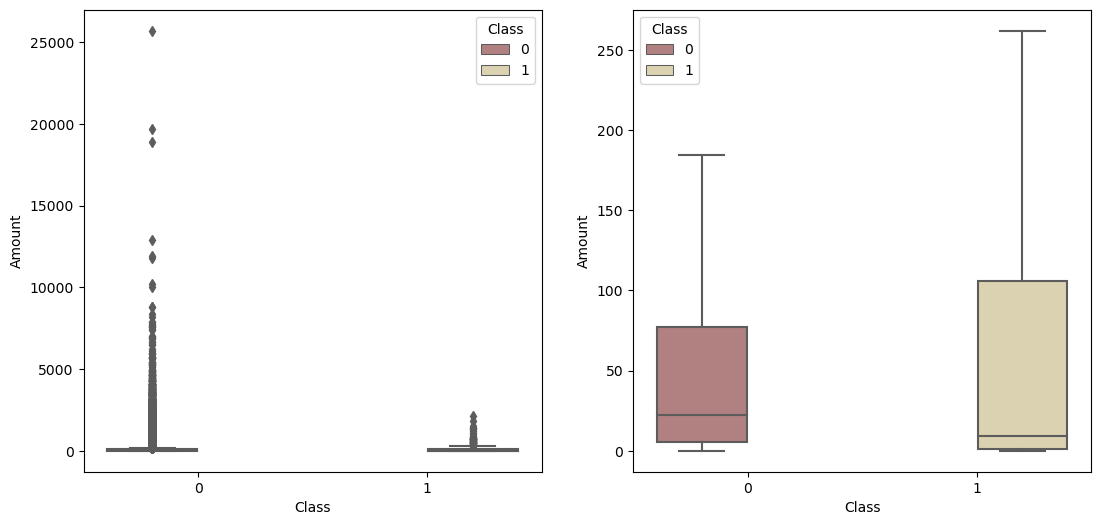

In [20]:
# Checking of outliers in the data
# Transaction amount 
data=df.copy()
data.drop(columns=['Class'], inplace = True)
for i in data.columns:
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,6))
  s = sns.boxplot(ax = ax1, x="Class", y=i, hue="Class",data=df, showfliers=True, palette="pink")
  s = sns.boxplot(ax = ax2, x="Class", y=i, hue="Class",data=df, showfliers=False,palette="pink")
  plt.show();

<div style="background-color: #C3FF93; padding: 10px 12px; border: 2px solid #7ABA78; color: #004085 ;border-radius: 8px">
    <h3>Inference:</h3>
  <li>Through the box plot one can see there exhibits some   outliers in the fraudulent data(class-1) and Non-fraudulent data(class-0).</li>
  <li> We will not be performing any outlier treatment for this particular dataset, as outlier detection and removal may need to be performed as a preprocessing step before applying PCA. So we assume that outlier treatment is already performed.</li>
</div>

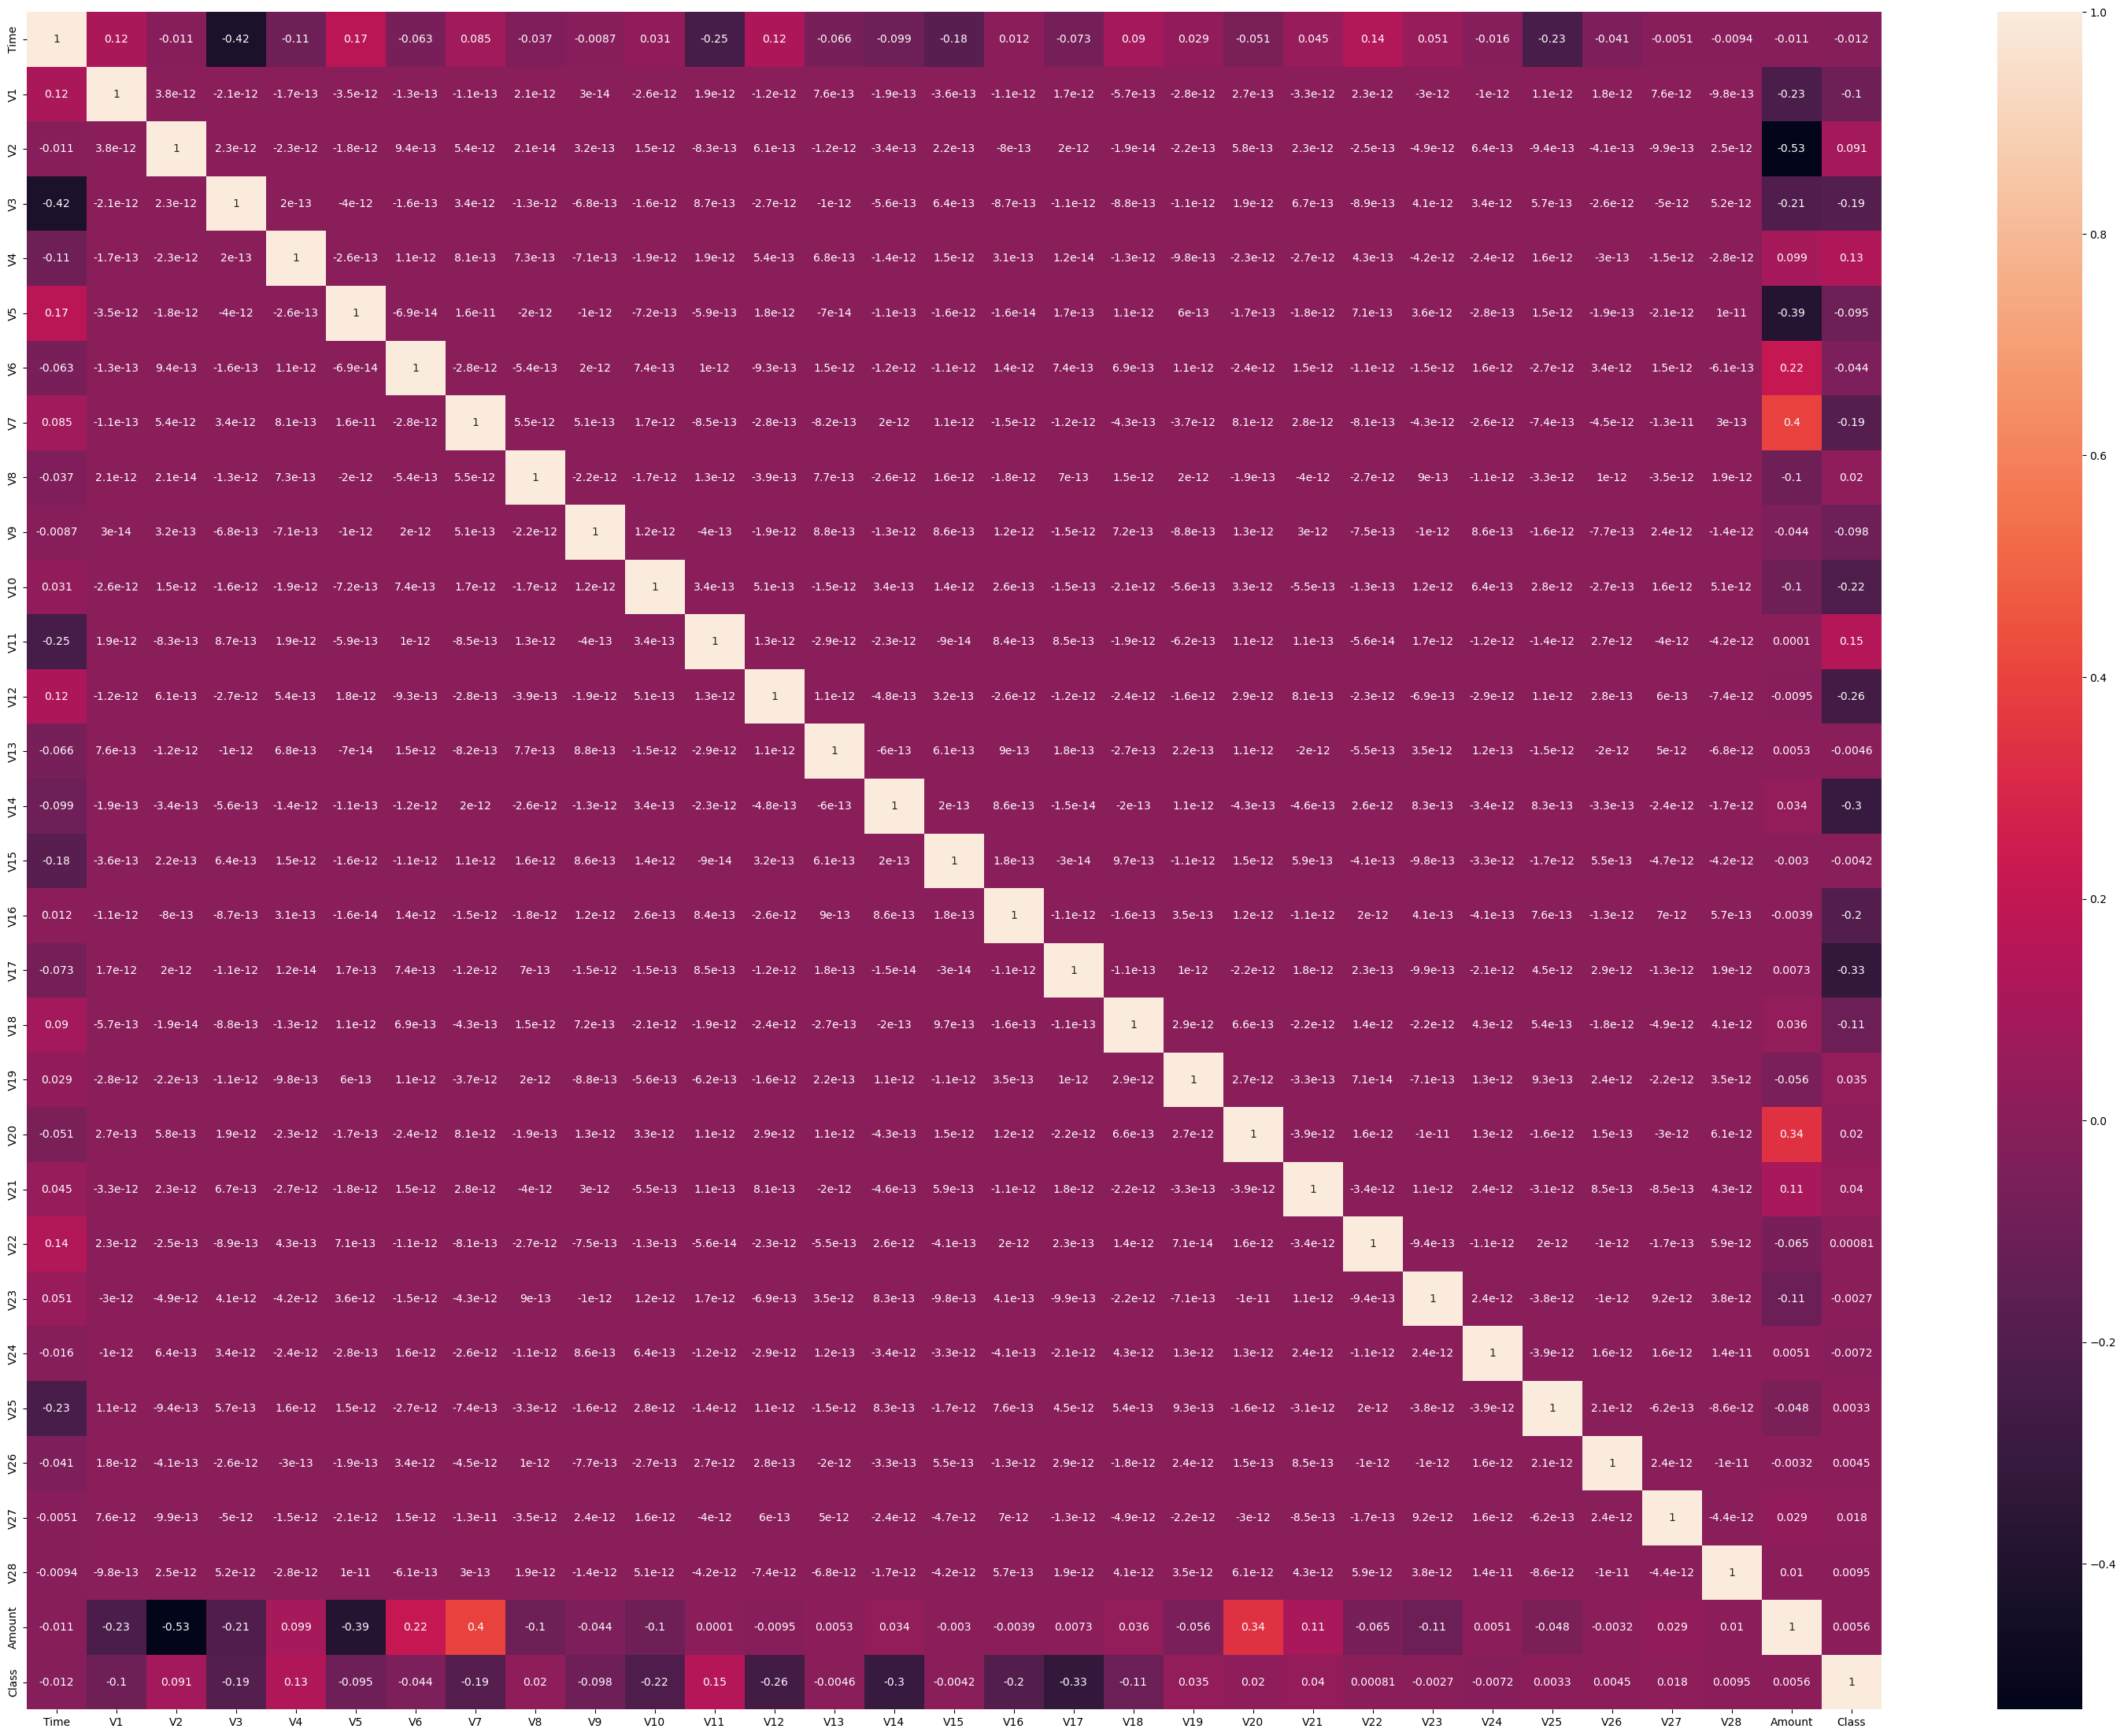

In [21]:
#heat map
plt.figure(figsize=(38,28))
sns.heatmap(df.corr(), annot=True)
plt.show()

# <p  style=" padding: 14px; font-size: 20px; background-color:#e2bfb3; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);"> 5.2: Missing Value Treatment</p>
⬆️[Table Contents](#table_content)

In [22]:
# missing values in train dataset
pd.DataFrame(df.isnull().sum())

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<div style="background-color: #C3FF93; padding: 10px 12px; border: 2px solid #7ABA78; color: #004085 ;border-radius: 8px">
    <h3>Inference:</h3>
     From above we can observe that there are no Missing Values in the dataset. The Missing values has already been taken care of.
</div>



# <p  style=" padding: 14px; font-size: 20px; background-color:#e2bfb3; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);"> 5.3: Checking Imbalanced Data</p>
⬆️[Table Contents](#table_content)

In [23]:
# counts of categories in class
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

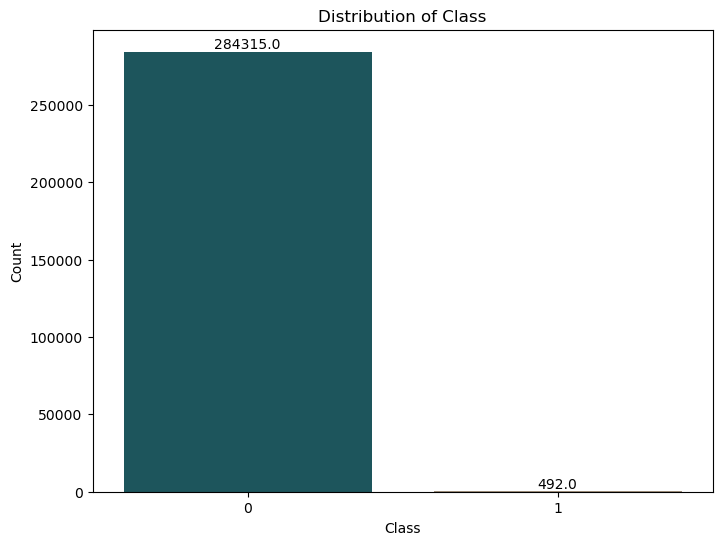

In [24]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=df, palette=['#135D66',"#A79277"])

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [25]:
print('Total % of fraud transaction: ',len(df[df['Class']==1])/len(df['Class'])*100,"%")
print('Total % of non-fraud transaction: ',len(df[df['Class']==0])/len(df['Class'])*100,"%")

Total % of fraud transaction:  0.1727485630620034 %
Total % of non-fraud transaction:  99.82725143693798 %


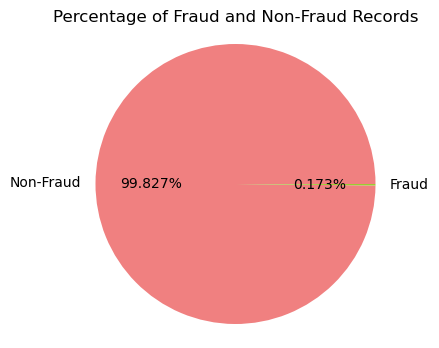

In [26]:
#finding percentage of fraudand non_fraud records
fraud_percentage = (df.groupby('Class')['Class'].count() / df['Class'].count()) * 100

plt.figure(figsize=(5, 4))
plt.pie(fraud_percentage, labels=['Non-Fraud', 'Fraud'], autopct='%0.3f%%',colors=["lightcoral","yellowgreen"])
plt.title('Percentage of Fraud and Non-Fraud Records')
plt.axis('equal')
plt.show()

<div style="background-color: #C3FF93; padding: 10px 12px; border: 2px solid #7ABA78; color: #004085 ;border-radius: 8px">
    <h3>Inference:</h3>
     The bar plot shows the percentage of fraudulent and non-fraudulent in the dataset. Approximately 284315 of the Class was non-fraudulent and 492 were fraudulent. This indicates that there is high imbalance in the target variable.
    To address this, we will use <b>SMOTE (Synthetic Minority Over-sampling Technique)</b>. SMOTE is a technique used to generate synthetic samples for the minority class in order to balance the class distribution in the dataset. By creating synthetic samples, SMOTE helps mitigate the impact of class imbalance and improves the performance of machine learning models in predicting the minority class.
</div>



# <p  style=" padding: 14px; font-size: 20px; background-color:#e2bfb3; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">5.3.1: Handling the Imbalanced Data</p>
⬆️[Table Contents](#table_content)

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE (sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm. fit_resample(df.drop('Class', axis=1), df['Class'])
oversampled = pd. concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)],axis=1)

In [28]:
oversampled

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,...,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,...,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,0,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,...,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,0,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,...,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,0,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,...,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,1,144838.659385,-6.379157,1.672637,-5.885670,2.068340,-0.668576,-3.336450,-4.995823,2.632847,-2.275158,-7.043645,3.922162,-4.486300,...,-3.848696,-5.049598,-1.340516,1.174201,-0.709398,0.641337,-0.249308,-2.311290,-0.159402,1.190079,-0.258067,0.777265,-0.728919,7.334751
568626,1,65965.011763,-2.479028,0.958932,-1.782249,1.541783,-1.191990,-0.466794,-1.957161,0.312580,-0.433956,-2.799702,1.906462,-3.547189,...,-2.484748,-5.271550,-1.948584,0.015455,-0.263193,0.351983,0.208869,-0.235986,-0.404446,0.220454,0.685263,-0.890346,0.598736,74.507571
568627,1,34592.129093,-1.799894,2.368957,-2.673997,1.705968,-1.355923,-1.121788,-2.057832,-1.677459,-0.659287,-3.377383,3.660286,-6.151653,...,-3.887999,-7.976272,-2.500047,-0.007701,0.468282,1.473371,-0.581778,-0.013899,-0.144597,0.120315,0.242272,-0.121166,-0.534238,102.486823
568628,1,129683.002907,0.255234,2.432041,-5.388252,3.793925,-0.230814,-1.382725,-1.572929,0.748305,-1.600633,-3.632747,3.350785,-3.858143,...,-2.578390,-1.317183,0.375253,2.075003,0.197287,0.316760,-0.036858,0.182968,0.190701,-0.339250,-0.272824,0.315507,-0.091005,58.346854


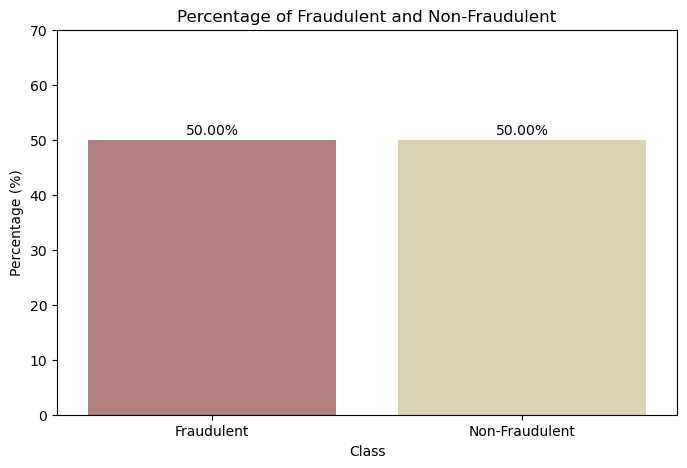

In [29]:
# Calculating the percentage of each class
percentage = oversampled['Class'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette="pink")
plt.title('Percentage of Fraudulent and Non-Fraudulent')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Fraudulent','Non-Fraudulent'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

In [30]:
oversampled.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

# <p id="1" style="text-align: center; padding: 20px; background-color: #C4E4FF; border-radius: 3px; border: 2px solid #003C43; font-size: 24px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">5: Splitting the Dataset </p>
⬆️[Table Contents](#table_content)

In [31]:
# Time is not required so we will drop the time column
oversampled.drop(['Time'], axis = 1, inplace= True)

In [32]:
#input and output variables
X=oversampled.drop(["Class"],axis=1)
y=oversampled["Class"]

# <p  style=" padding: 14px; font-size: 20px; background-color:#e2bfb3; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);"> Power Transformation</p>
⬆️[Table Contents](#table_content)

since the data is skewed so power transformation is required

In [33]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate the powertransformer
pt = PowerTransformer()
# Fit and transform the PT on training data
x_scaled = pt.fit_transform(X)

In [34]:
# Transform the test set
x_scaled = pt.transform(X)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=42)

# <p id="1" style="text-align: center; padding: 20px; background-color: #C4E4FF; border-radius: 3px; border: 2px solid #003C43; font-size: 24px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">6: Model Building </p>
⬆️[Table Contents](#table_content)

- Logistic Regression Model<br>
- KNearest Neighbour Model<br>
- Xgboost

<div style="background-color: #C3FF93; padding: 10px 12px; border: 2px solid #7ABA78; color: #004085 ;border-radius: 8px">
    <h3>Evaluation Matrix:</h3>
   
    
   - Accuracy: It measures the overall correction of prediction.<br>
      <b>Accuracy = (TP+TN) / (TP+TN+FP+FN)<b/>
  - Precision: It measure the proportion of true positive predictions out of all positive predictions made by a classification model.<br>
          <b>Precision = (TP) / (TP+FP)<b/>
  - Recall: It measures the proportion of true positive predictions out of all actual positive instances in the dataset.<br>
           <b>Recall = (TP) / (TP+FN)<b/>
   - F1 Score: It is the harmonic mean of precision and recall.<br>
            <b>F1 Score = 2* (precision * recall) / (precision + recall)<b/>   
            


          
</div>

# <p  style=" padding: 14px; font-size: 20px; background-color:#A1C398; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);"> Logistic Regression</p>
⬆️[Table Contents](#table_content)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [38]:
# Prediction of test dataset
prediction=logistic.predict(X_test)
prediction

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix

# confusion matrix
cm1=confusion_matrix(y_test,prediction)
cm1

array([[56081,   669],
       [ 1422, 55554]], dtype=int64)

In [40]:
# Accuracy of test dataset
accuracy_score(y_test,prediction)

0.9816137031109861

In [41]:
# ACCURACY OF Logistic Regression
from sklearn import metrics
accuracyList=[]
modelList=[]
# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test,prediction))
accuracyList.append(metrics.accuracy_score(y_test, prediction))
modelList.append("Logistic Regression")

Accuracy: 0.9816137031109861


In [42]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm1
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precisionList=[]
recallList=[]
F1_ScoreList=[]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
print("F1 Score", 2* (TP/(TP+FP) * TP/(TP+FN))/TP/(TP+FP)+TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))
F1_ScoreList.append(2* (TP/(TP+FP) * TP/(TP+FN))/TP/(TP+FP)+TP/(TP+FN))

precision 0.9881009551251267
recall 0.9750421229991575
F1 Score 0.9750421236160725


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [44]:
class_report_LR = classification_report(y_test, prediction, target_names = ['Non-Fraud', 'Fraud'])

In [45]:
print("Logistic Regression Classification Report:")
print(class_report_LR)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.99      0.98     56750
       Fraud       0.99      0.98      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



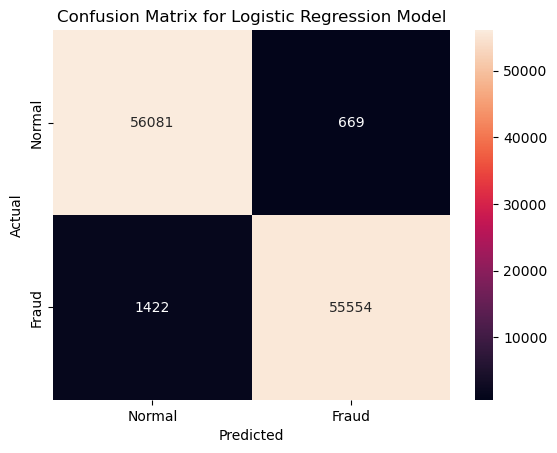

In [46]:
cm1 = confusion_matrix(y_test, prediction)
labels = ['Normal', 'Fraud']
sns.heatmap(cm1, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

<div style="background-color: #C3FF93; padding: 10px 12px; border: 2px solid #7ABA78; color: #004085 ;border-radius: 8px">
    <h3>Inference:</h3>
    <li>
     The true positive = 56081<br>
        <li/>
      The False Negative = 669<br>
    <li/>
      The False Positive = 1422<br>
    <li/>
      The True Negative = 55554<br>
        
 </div>

In [47]:
# Prediction of train dataset
prediction1=logistic.predict(X_train)
prediction1

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [48]:
# Accuracy of train dataset
accuracy_score(y_train,prediction1)

0.9814532296924187

### Test and train accuracy is almost similar. So we can say there is no overfitting or underfitting

In [49]:
# Roc_auc curve
metrics.roc_auc_score(y_test , prediction) 

0.9816267883718254

AUC -  0.9816267883718254 



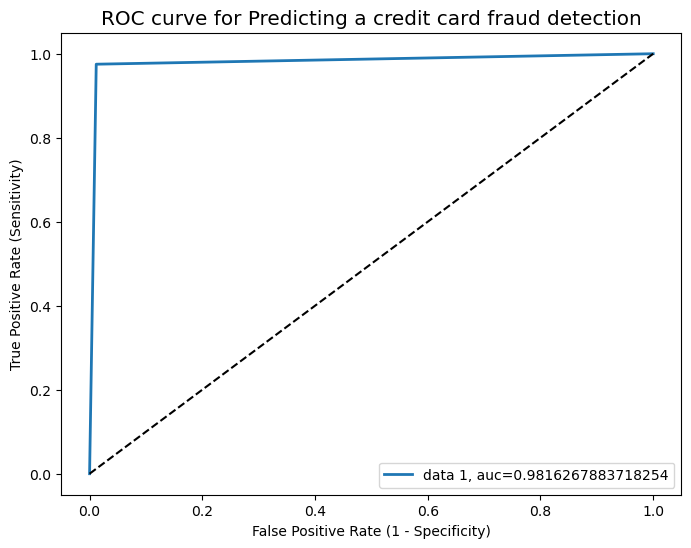

In [50]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)

auc = metrics.roc_auc_score(y_test, prediction)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


<div style="background-color: #F5EEE6; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>Logistic Regression Model Evaluation </h3>
    <ul style="list-style-type: square; color: #004085;">
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            </tr>
        <tr>
            <td>Accuracy</td>
            <td>98%</td>
        </tr>
        <tr>
            <td>Precision </td>
            <td>98.81%</td>
         </tr>
        <tr>
            <td>Recall </td>
            <td>97.50%</td>
         </tr>
      </table>
     </ul>

</div>

# <p  style=" padding: 14px; font-size: 20px; background-color:#A1C398; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);"> K Nearest Neighbour (KNN) Model</p>
⬆️[Table Contents](#table_content)


In [51]:
#Applying the K-Nearest Neighbour on the training dataset
from sklearn.neighbors import KNeighborsClassifier
knnmodel_ini = KNeighborsClassifier()
knnmodel_ini.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
#Running the model on the test dataset
y_pred_ini_knn = knnmodel_ini.predict(X_test)

In [53]:
#Importing all the functions to for checking the accuracies
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,roc_curve, accuracy_score, log_loss

In [54]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_ini_knn)

0.9991646589170462

In [55]:
cm2=confusion_matrix(y_test,y_pred_ini_knn)
cm2

array([[56655,    95],
       [    0, 56976]], dtype=int64)

In [56]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm2
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
print("F1 Score", 2* (TP/(TP+FP) * TP/(TP+FN))/TP/(TP+FP)+TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))
F1_ScoreList.append(2* (TP/(TP+FP) * TP/(TP+FN))/TP/(TP+FP)+TP/(TP+FN))

precision 0.9983354067740183
recall 1.0
F1 Score 1.0000000006140433


In [57]:
class_report_KNN = classification_report(y_test, y_pred_ini_knn, target_names = ['Non-Fraud', 'Fraud'])

In [58]:
print(class_report_KNN)

'              precision    recall  f1-score   support\n\n   Non-Fraud       1.00      1.00      1.00     56750\n       Fraud       1.00      1.00      1.00     56976\n\n    accuracy                           1.00    113726\n   macro avg       1.00      1.00      1.00    113726\nweighted avg       1.00      1.00      1.00    113726\n'

In [59]:
# ACCURACY OF KNN(validation dataset)
from sklearn import metrics

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ini_knn))
accuracyList.append(metrics.accuracy_score(y_test, y_pred_ini_knn))
modelList.append("KNN")

Accuracy: 0.9991646589170462


### Comparing the test and train data Accuracies

In [60]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_test_knn = knnmodel_ini.predict(X_train)

In [61]:
# Checking the accuracy of training dataset 
accuracy_score(y_train,y_pred_test_knn)

0.9995009936162356

In [62]:
#Checking the accuracy of test dataset
accuracy_score(y_test,y_pred_ini_knn)

0.9991646589170462

<div style="background-color: #F5EEE6; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>KNN Model Evaluation </h3>
    <ul style="list-style-type: square; color: #004085;">
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>99.91%</td>
        </tr>
        <tr>
            <td>Precision</td>
            <td>99.83%</td>
        </tr>
        <tr>
            <td>Recall</td>
            <td>100%</td>
        </tr>
        <tr>
            <td>F1 Score</td>
            <td>100%</td>
        </tr>
      </table>
    </ul>
</div>


## Hyperparameter Tuning: Finding the best value for K

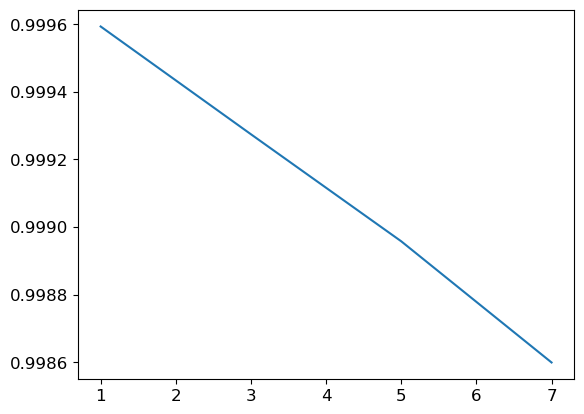

In [78]:
#Using K-fold cross validation technique we will find the best value of K
k_value = [1,3,5,7]
from sklearn.model_selection import cross_val_score
cv_score = []

for k in k_value:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knnmodel, X_train,y_train,cv=3, scoring='accuracy')
    cv_score.append(scores.mean())
    
cv_score
plt.plot(k_value, cv_score)
plt.show()

In [79]:
#Applying the K-Nearest Neighbour on the training dataset
from sklearn.neighbors import KNeighborsClassifier
knnmodel_tuned = KNeighborsClassifier(n_neighbors=3)
knnmodel_tuned.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
#Running the model on the test dataset
y_pred_tuned = knnmodel_tuned.predict(X_test)

In [82]:
#Using accuracy score we are checking the accuracy on the validation dataset
accuracy_score(y_test,y_pred_tuned)

0.9994636230941034

<div
<p style="background-color: #F5EEE6; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;"> <b>KNN Model Evaluation after Tuning<b/>
   </p>
      
      Accuracy after Hyperparameter Tuning: 99.94%
</div>

# <p  style=" padding: 14px; font-size: 20px; background-color:#A1C398; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">XgBoost Model</p>
⬆️[Table Contents](#table_content)

In [65]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:

import xgboost as xgb

In [67]:
#Define the model 
xgb_cal=xgb.XGBClassifier( n_estimators = 10)
xgb_cal

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
# Fit  from the model
xgb_cal.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
#predict the model
preds_xg = xgb_cal.predict(X_test)
preds_xg

array([1, 1, 0, ..., 1, 1, 0])

In [70]:

# ACCURACY OF Xgboost
from sklearn import metrics
# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, preds_xg))
accuracyList.append(metrics.accuracy_score(y_test, preds_xg))
modelList.append("XGBoost")

Accuracy: 0.9900638376448657


In [71]:
#import the confusion matrix from scikit learn
from sklearn.metrics import confusion_matrix
#create the confusion matrix
cm3 = confusion_matrix(y_test, preds_xg)
cm3

array([[56398,   352],
       [  778, 56198]], dtype=int64)

In [72]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm3
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
print("F1 Score", 2* (TP/(TP+FP) * TP/(TP+FN))/TP/(TP+FP)+TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))
F1_ScoreList.append(2* (TP/(TP+FP) * TP/(TP+FN))/TP/(TP+FP)+TP/(TP+FN))

precision 0.9937754199823166
recall 0.9863451277730975
F1 Score 0.9863451283899675


<div style="background-color: #F5EEE6; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>XgBoost Model Evaluation </h3>
    <ul style="list-style-type: square; color: #004085;">
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>99%</td>
        </tr>
        <tr>
            <td>Precision </td>
            <td>99.37%</td>
       </tr>
        <tr>
            <td>Recall </td>
            <td>98.63%</td>
        </tr>
        <tr>
            <td>F1 Score </td>
            <td>98.63%</td>
        </tr>
      </table>
    </ul>
</div>

# Hyperparameter tuning in XgBoost


<div style="background-color: #C3FF93; padding: 10px 12px; border: 2px solid #7ABA78; color: #004085 ;border-radius: 8px">
    <h3>Note:</h3>
       Due to the large number of XGBoost hyperparameters, the process of finding optimal hyperparameters will be very time-consuming. For this reason, we made the set of grid values smaller and finally we got the following optimal combination of hyperparameters for our XGBoost classifier:
</div>

In [73]:
# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_tun = xgb.XGBClassifier(max_depth=6,
                        learning_rate=0.05,
                        n_estimators=200,  
                        min_child_weight=2,
                        scale_pos_weight=0.5,
                        subsample=0.9 ,
                        colsample_bytree=0.5,
                        colsample_bylevel=0.8 ,
                        reg_alpha=0.05 ,
                        reg_lambda=0.1 ,
                        max_delta_step=2 ,
                        gamma=0.1,
                        random_state=0)

# fit the XGBoost classifier
xgb_tun.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=6, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [74]:
#predict the model
preds_tun = xgb_tun.predict(X_test)
preds_tun

array([1, 1, 0, ..., 1, 1, 0])

In [76]:
accuracy_score(y_test,preds_tun)

0.9985403513708386

In [75]:
#import the confusion matrix from scikit learn
from sklearn.metrics import confusion_matrix
#create the confusion matrix
cm4 = confusion_matrix(y_test, preds_tun)
cm4

array([[56706,    44],
       [  122, 56854]], dtype=int64)

<div
<p style="background-color: #F5EEE6; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;"> <b>XgBoost Model Evaluation after Tuning<b/>
   </p>
      
    
   </p>
      
      Accuracy after Hyperparameter Tuning:99.85%
</div>

# <p id="1" style="text-align: center; padding: 20px; background-color: #C4E4FF; border-radius: 3px; border: 2px solid #003C43; font-size: 24px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">7: Conclusion </p>
⬆️[Table Contents](#table_content)

In [77]:
# We create a final list to collate all the results so far
finalList= [modelList, accuracyList, precisionList, recallList,F1_ScoreList]
# final dataframe to see all the results.
pd.DataFrame(finalList, index=['Model', 'Accuracy', 'Precision', 'Recall',"F1 Score"]).T

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.981614,0.988101,0.975042,0.975042
1,KNN,0.999165,0.998335,1.0,1.0
2,XGBoost,0.990064,0.993775,0.986345,0.986345


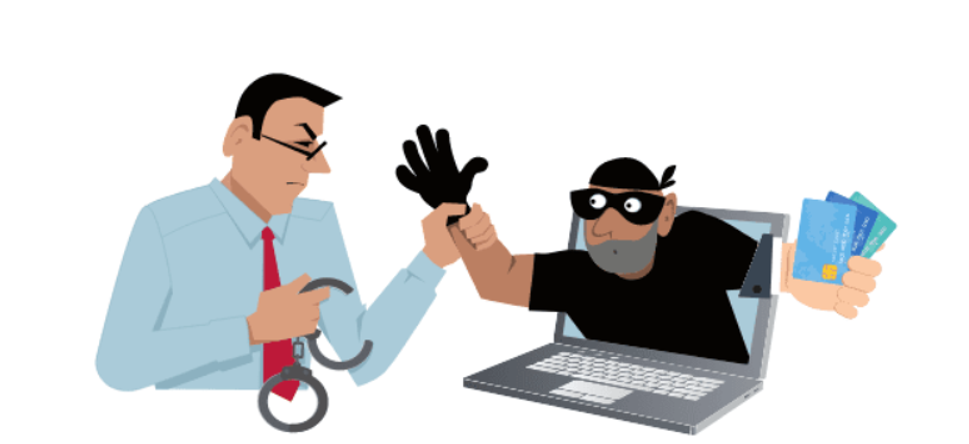